<a href="https://colab.research.google.com/github/GouravSinghal22/Water-quality-analyser-and-potability-prediction-system/blob/main/Water_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Analysis

In [148]:
!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv("water_potability.csv")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Water Quality Dataset

### Columns:

1. **pH:**
   - *Definition:* pH is a measure of the acidity or alkalinity of water. It indicates the concentration of hydrogen ions.
   - *Importance:* pH levels can influence the chemical and biological processes in water, affecting aquatic life and the suitability of water for various uses.

2. **Hardness:**
   - *Definition:* Hardness refers to the concentration of minerals, primarily calcium and magnesium, in water.
   - *Significance:* High hardness can impact water taste, plumbing, and can lead to scale buildup in pipes and appliances.

3. **Solids:**
   - *Definition:* Solids represent the total dissolved and suspended particles in water, measured in parts per million (ppm).
   - *Relevance:* High solids content can affect water clarity, taste, and may indicate pollution or the presence of minerals.

4. **Chloramines:**
   - *Definition:* Chloramines are chemical compounds formed by the combination of chlorine and ammonia in water treatment.
   - *Purpose:* Chloramines are disinfectants used to control microbial growth and ensure water safety.

5. **Sulfate:**
   - *Definition:* Sulfate is a salt or ester of sulfuric acid and is present in water sources.
   - *Impact:* Elevated sulfate levels may affect water taste and can have health implications. It's also a key parameter in industrial processes.

6. **Conductivity:**
   - *Definition:* Conductivity measures the ability of water to conduct an electric current, indicating the presence of dissolved ions.
   - *Application:* Used to assess water quality, conductivity is influenced by dissolved salts and minerals.

7. **Organic Carbon:**
   - *Definition:* Organic carbon measures the amount of carbon derived from living organisms in the water.
   - *Concerns:* Elevated levels can indicate pollution and may contribute to taste and odor issues in water.

8. **Trihalomethanes:**
   - *Definition:* Trihalomethanes are chemical byproducts formed when chlorine reacts with organic matter in water.
   - *Risk:* Some trihalomethanes are considered potential carcinogens, making their monitoring crucial for public health.

9. **Turbidity:**
   - *Definition:* Turbidity measures the cloudiness or haziness of a fluid caused by large numbers of particles.
   - *Implications:* High turbidity can impact light penetration, aquatic ecosystems, and treatment processes.

10. **Potability:**
    - *Definition:* Potability indicates whether water is safe for human consumption.
    - *Criteria:* Compliance with regulatory standards ensures that water meets health and safety requirements for drinking.

This dataset provides a comprehensive overview of various parameters crucial for assessing water quality and safety.


# Info about the data

In [150]:
df.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [152]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [153]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## visualize null values present in dataset

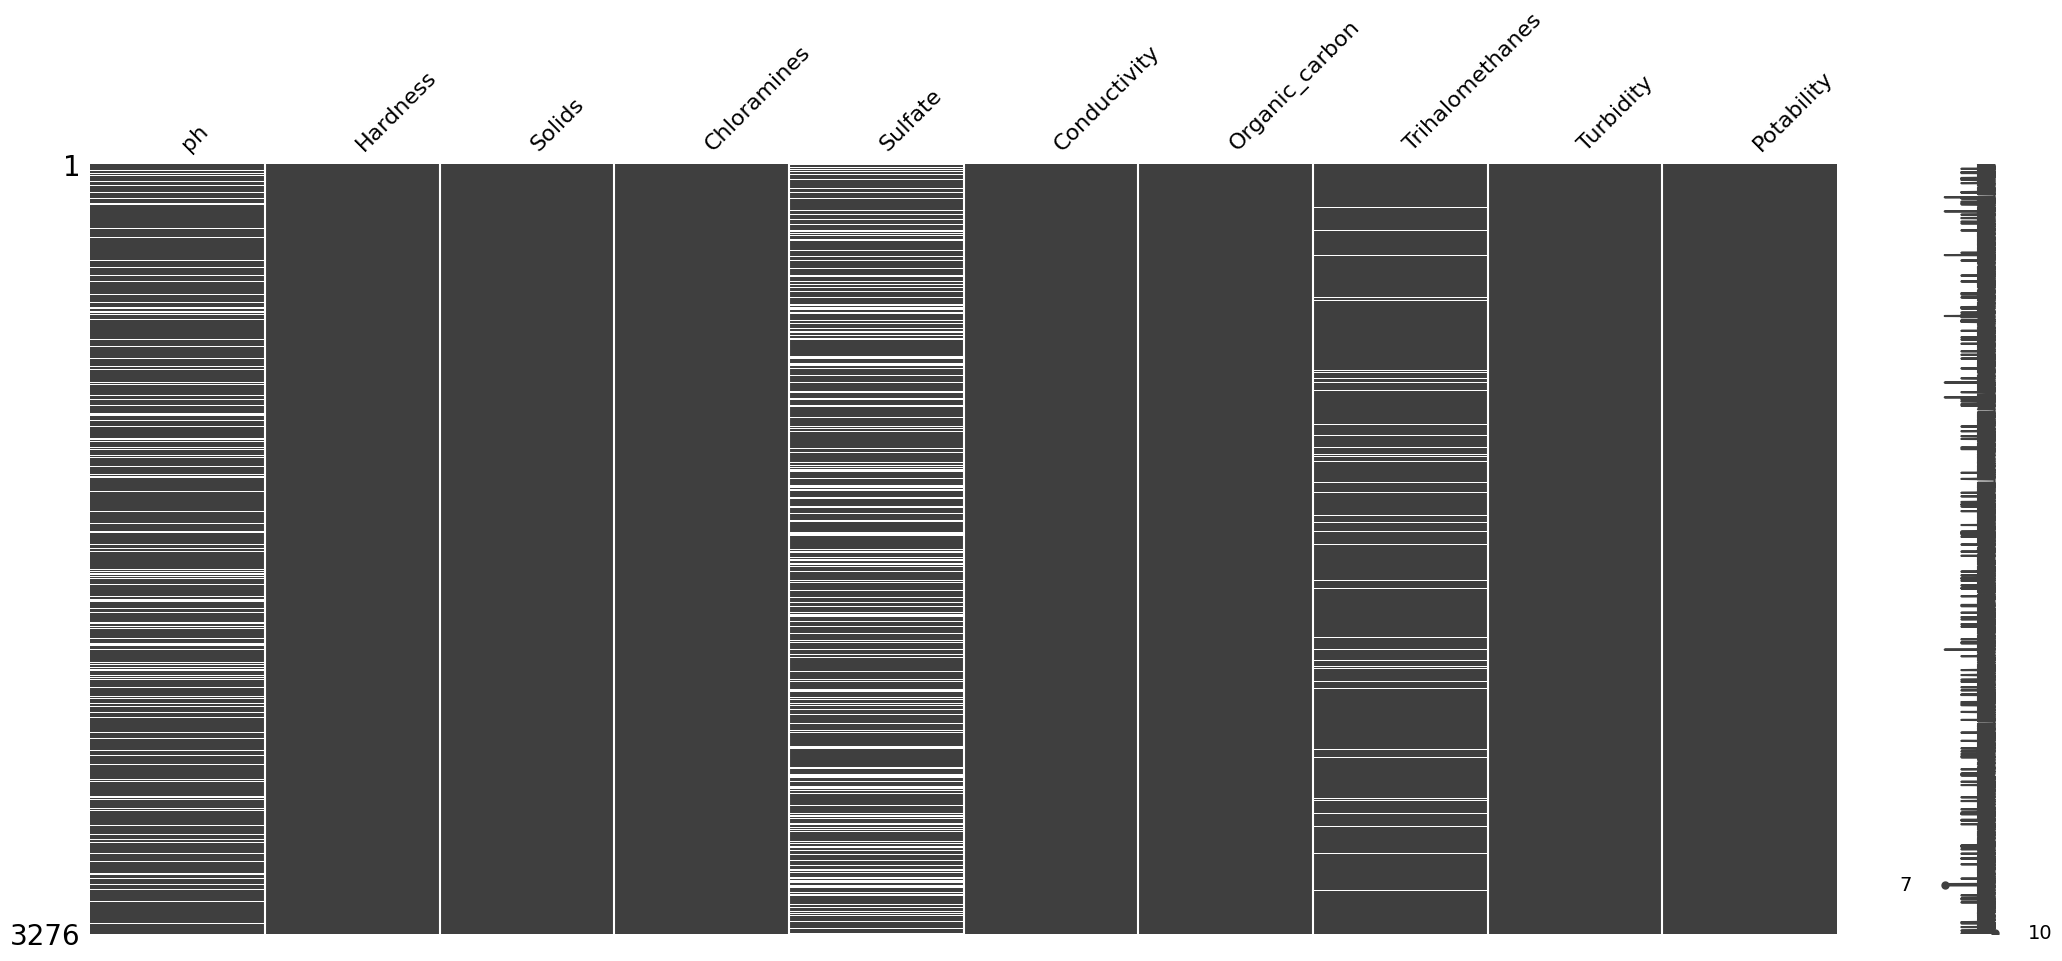

In [154]:
import missingno as msno
msno.matrix(df)
plt.show()

# Deleting all the null values

In [155]:
df1=df.copy()
df1.shape

(3276, 10)

In [156]:
df1.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [157]:
df1 = df1.dropna()

In [158]:
df1.shape

(2011, 10)

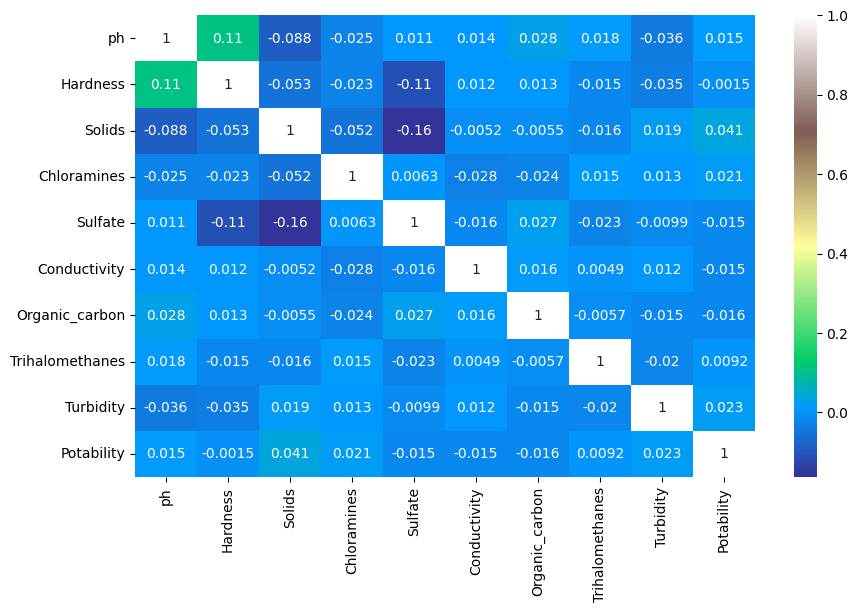

In [159]:
sns.heatmap(df1.corr(),annot= True,cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#we are trying the reduce the dimension to which are correlating for that we are looking for the similarity of the features with this chart
#because less feature is making easy to the predict but we have so small similarity of the features and we cant use the remove feature

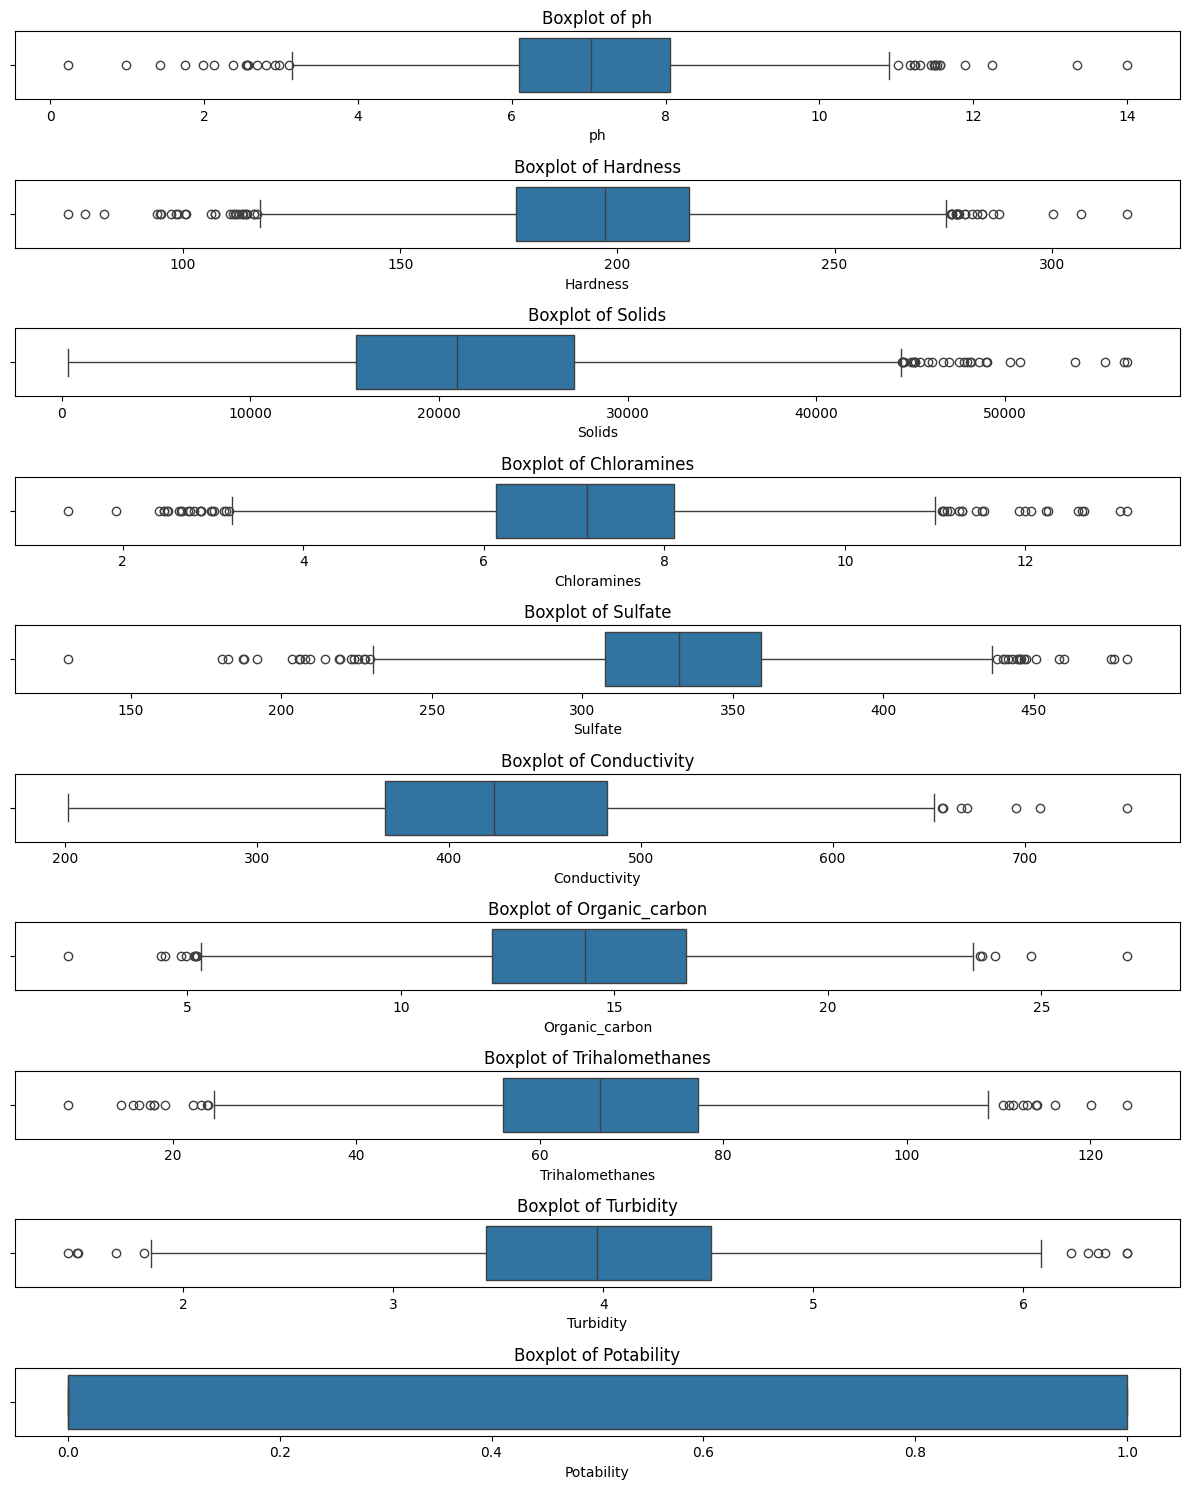

In [160]:
columns_to_plot = df1.columns.values.tolist()
plt.figure(figsize=(12, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [161]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [162]:
# Remove outliers for each specified column
for column in columns_to_plot:
    df1 = remove_outliers_iqr(df1, column)

# Reset index after removing outliers
df1.reset_index(drop=True, inplace=True)

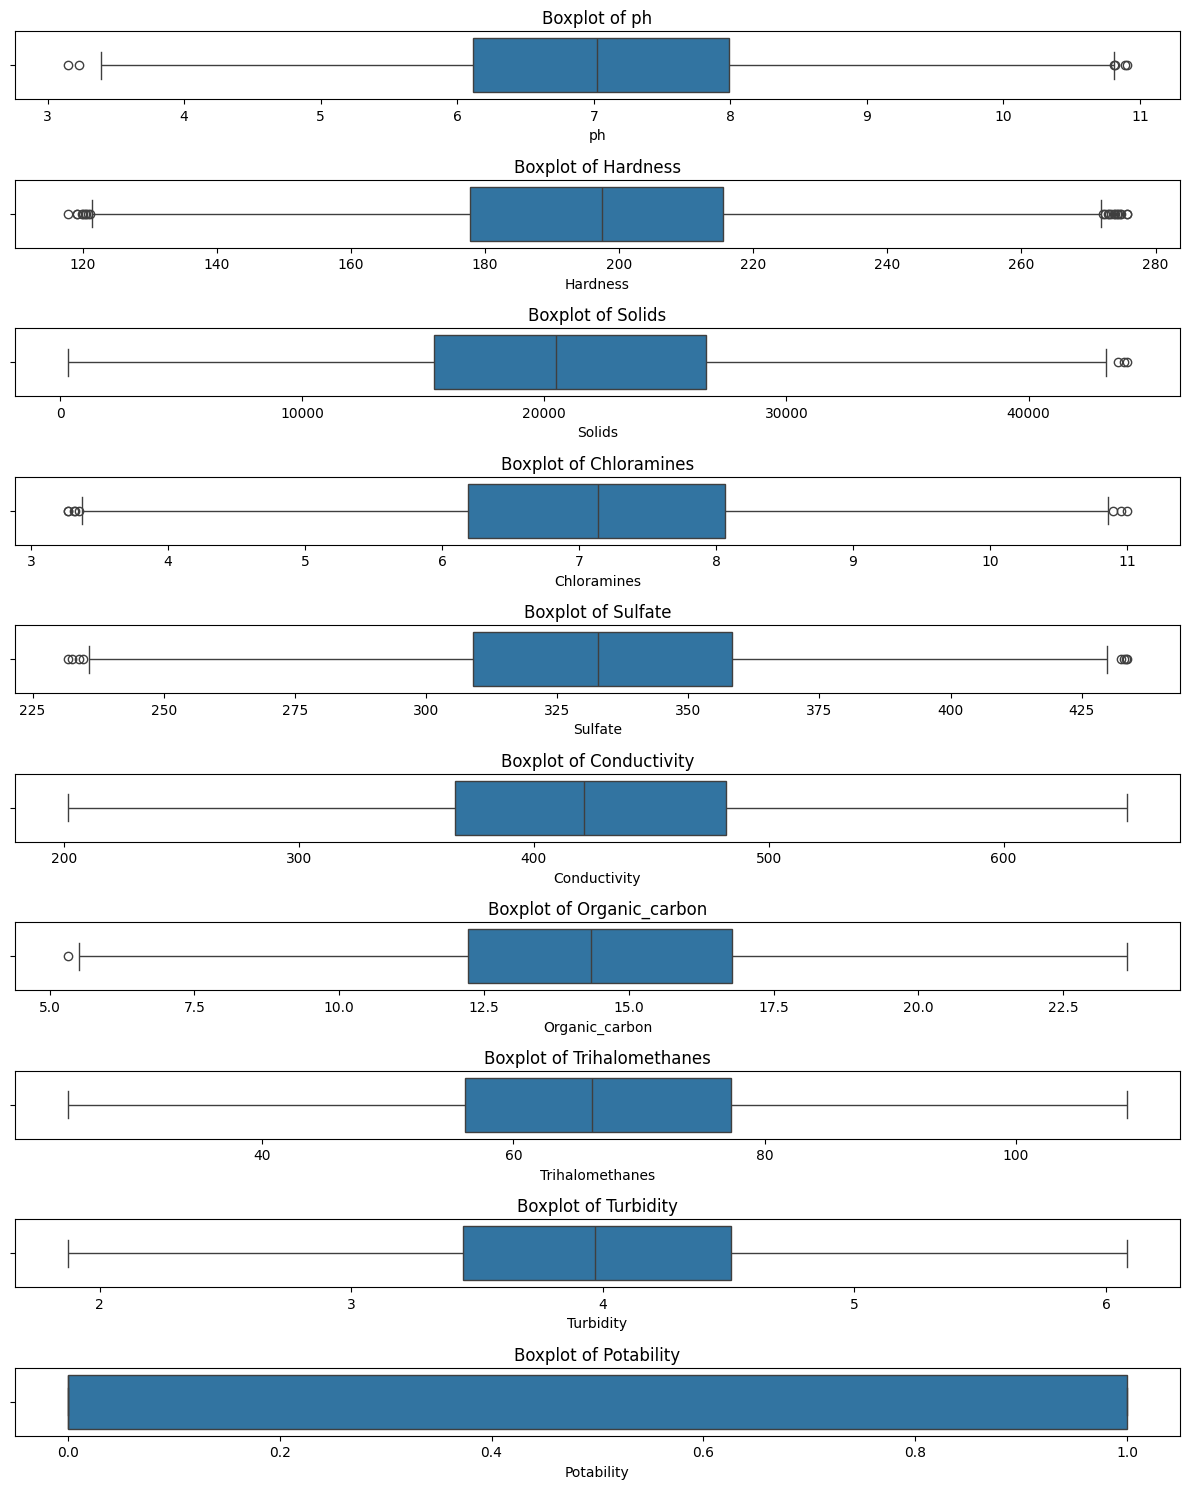

In [163]:
plt.figure(figsize=(12, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [164]:
df1.shape

(1789, 10)

### Almost 45% of data is been removed therefore it is not suitable to delete null values

# Filling null values with mean

In [165]:
df2 = df.copy()

In [166]:
df2.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Missing Values : PH Level
#### According to survey and science, water that has a lower PH Level is acidic and more likely to be soft water due to the fact that minerals (calcium and magnesium) found in hard water reduce the acidic properties of the water supply, thus achieving an average ph Level of 7 - 8 while soft water ranges from 6 - 7.

To impute the missing Values of The PH Level Column, we will be grouping the rows into 4 classifications :

Not Potable and Hardness <= 150 (Soft Water)

Not Potable and Hardness > 150 (Hard Water)

Potable and Hardness <= 150 (Soft Water)

Potable and Hardness > 150 (Hard Water)

Get the mean of each classification and impute it on the missing values

In [167]:
import warnings
warnings.filterwarnings('ignore')

print('Conditonal Statements to fill in the Missing Values of PH Value Column')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = df2[(df2['Potability'] == 0) & (df2['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = df2[(df2['Potability'] == 0) & (df2['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = df2[(df2['Potability'] == 1) & (df2['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = df2[(df2['Potability'] == 1) & (df2['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))

Conditonal Statements to fill in the Missing Values of PH Value Column


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 7.0982


if Potability = 1 and Hardness > 150
PH VALUE : 7.0714


In [168]:
for x in range(0, len(df2)) :
    if (pd.isnull(df2['ph'][x]) == True) :
        if ((df2['Potability'][x] == 0) & (df2['Hardness'][x] <= 150)) : df2['ph'][x] = condition_1_mean_ph
        elif ((df2['Potability'][x] == 0) & (df2['Hardness'][x] > 150)) : df2['ph'][x] = condition_2_mean_ph
        elif ((df2['Potability'][x] == 1) & (df2['Hardness'][x] <= 150)) : df2['ph'][x] = condition_3_mean_ph
        elif ((df2['Potability'][x] == 1) & (df2['Hardness'][x] > 150)) : df2['ph'][x] = condition_4_mean_ph

## Missing Values : Sulfate Column

In [169]:
print('Conditonal Statements to fill in the Missing Values of Sulfate Column')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = df2[(df2['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = df2[(df2['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))

Conditonal Statements to fill in the Missing Values of Sulfate Column


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670


In [170]:
for x in range(0, len(df2)) :
    if (pd.isnull(df2['Sulfate'][x]) == True) :
        if (df2['Potability'][x] == 0) : df2['Sulfate'][x] = condition_1_mean_sulfate
        else : df2['Sulfate'][x] = condition_2_mean_sulfate

## Missing Values : Trihalomethanes

In [171]:
print("Mean of Trihalomethanes : {:.4f}".format(float(df2['Trihalomethanes'].mean())))

df2['Trihalomethanes'].fillna(value = df2['Trihalomethanes'].mean() , inplace = True)

Mean of Trihalomethanes : 66.3963


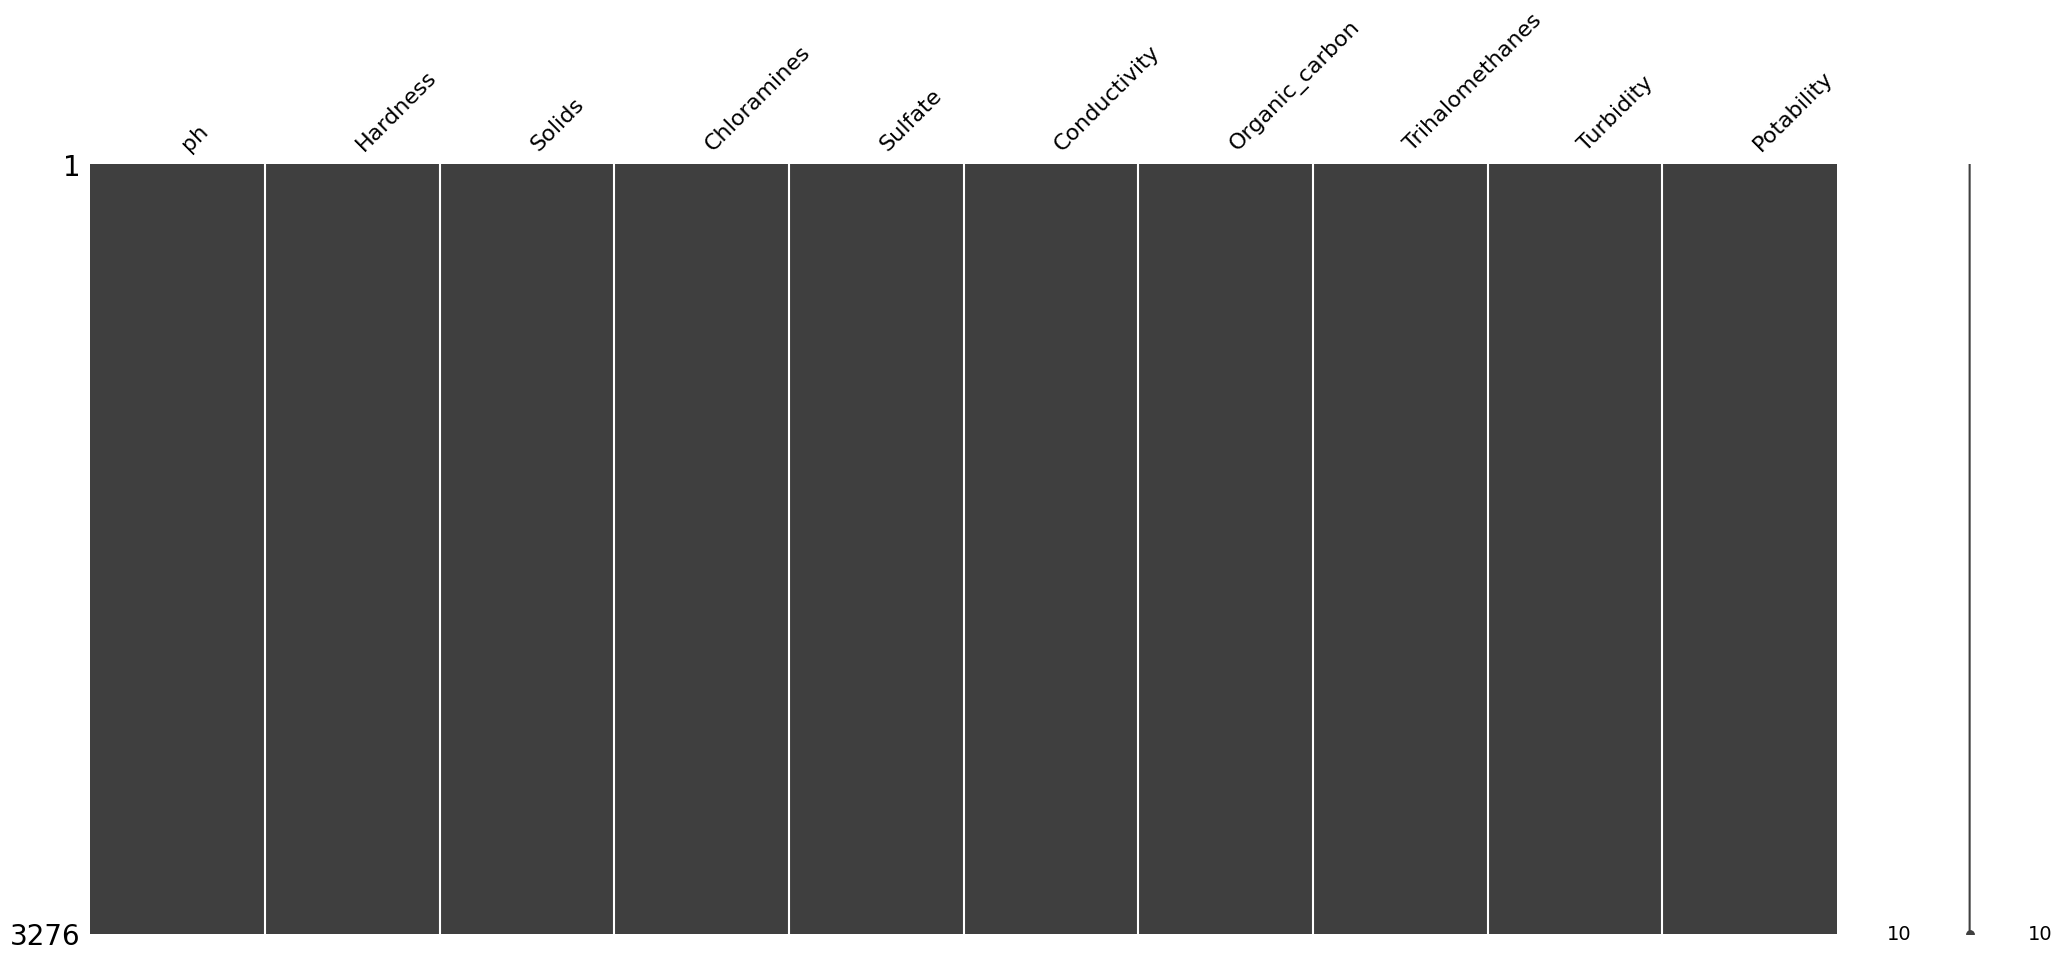

In [172]:
msno.matrix(df2)
plt.show()

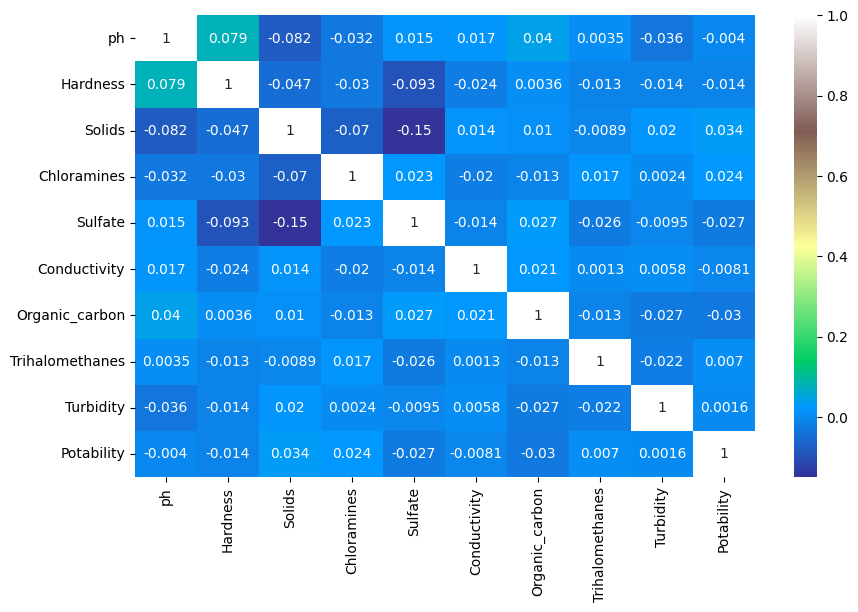

In [173]:
sns.heatmap(df2.corr(),annot= True,cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#we are trying the reduce the dimension to which are correlating for that we are looking for the similarity of the features with this chart
#because less feature is making easy to the predict but we have so small similarity of the features and we cant use the remove feature

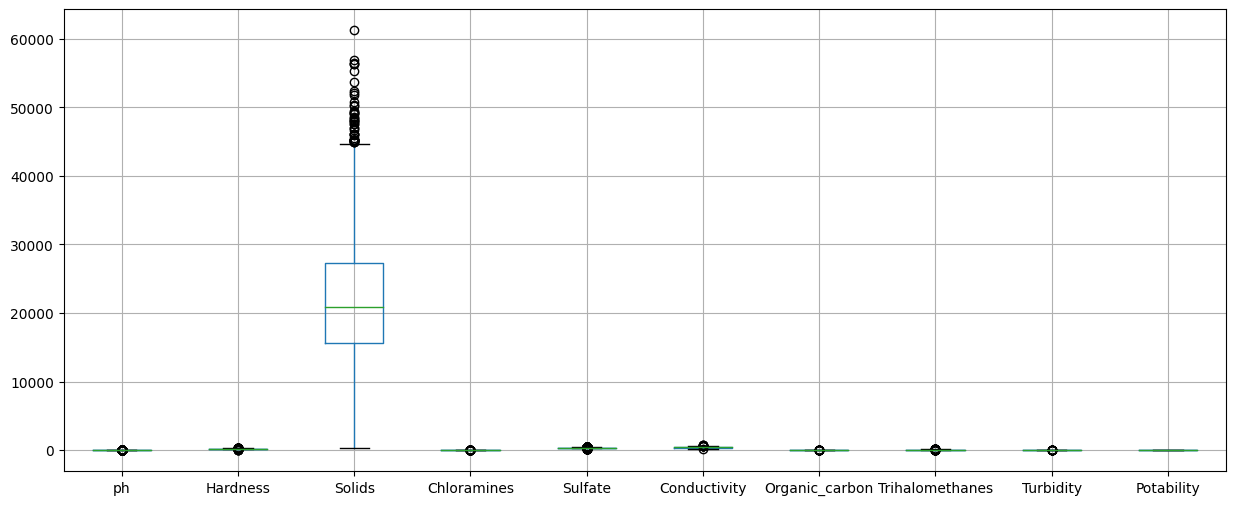

In [174]:
df2.boxplot(figsize=(15,6))
plt.show()

#You can see outliers but if we remove this outliers we cant have good predict the result will be closer to good water
#Our purpose in not removing outlier is to estimate from a wide range of data.

In [175]:
df2['Solids'].describe()
#this data shows us a mean value is a 22014 around and %75 is a 27000 around %25 around 15000

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690300
50%      20927.833605
75%      27332.762125
max      61227.196010
Name: Solids, dtype: float64

In [176]:
df2['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [177]:
import plotly.express as px
fig = px.pie(df2,names ="Potability",hole = 0.4,template ="plotly_dark")
fig.show()

In [178]:
fig = px.scatter(df2,x ="ph",y="Hardness",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a 0.076 and here is the distribution of those data

In [179]:
fig = px.scatter(df2,x ="Organic_carbon",y="Hardness",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a 0.04 and here is the distribution of those data

In [180]:
fig = px.scatter(df2,x ="Sulfate",y="Solids",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a -0.15 and here is the distribution of those data

# Machine learning Model

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in the actual class.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

Support: Support is the number of actual occurrences of the class in the specified dataset.

Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations.

Macro Avg: This is the average of the precision, recall, and F1-score for both classes.

Weighted Avg: Weighted average takes into account the number of samples for each class.

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, algorithm_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {algorithm_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [182]:
# Define features and target
X = df2.drop('Potability', axis=1)
y = df2['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Logistic Regression

Logistic Regression Accuracy:  0.5335365853658537


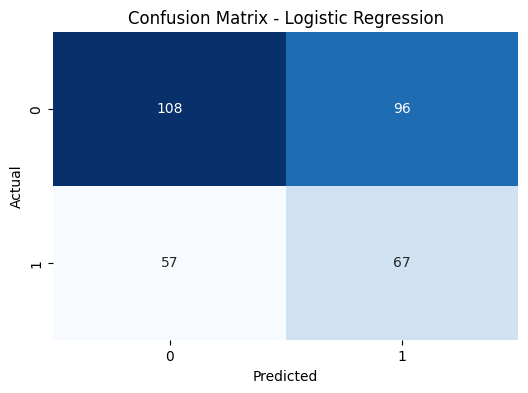


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.53      0.59       204
           1       0.41      0.54      0.47       124

    accuracy                           0.53       328
   macro avg       0.53      0.53      0.53       328
weighted avg       0.56      0.53      0.54       328



In [183]:
# # Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)
# log_reg_pred = log_reg.predict(X_test)
# print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_pred))

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_pred))
plot_confusion_matrix(y_test, log_reg_pred, 'Logistic Regression')

# Classification Report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, log_reg_pred))

# Decision Tree

Decision Tree Accuracy:  0.75


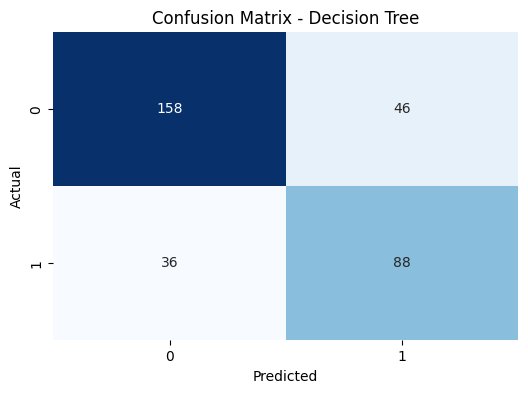


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       204
           1       0.66      0.71      0.68       124

    accuracy                           0.75       328
   macro avg       0.74      0.74      0.74       328
weighted avg       0.75      0.75      0.75       328



In [184]:
# # Decision Tree
# dec_tree = DecisionTreeClassifier()
# dec_tree.fit(X_train, y_train)
# dec_tree_pred = dec_tree.predict(X_test)
# print("Decision Tree Accuracy: ", accuracy_score(y_test, dec_tree_pred))


# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, dec_tree_pred))
plot_confusion_matrix(y_test, dec_tree_pred, 'Decision Tree')

# Classification Report for Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dec_tree_pred))

# Random Forest

Random Forest Accuracy:  0.801829268292683


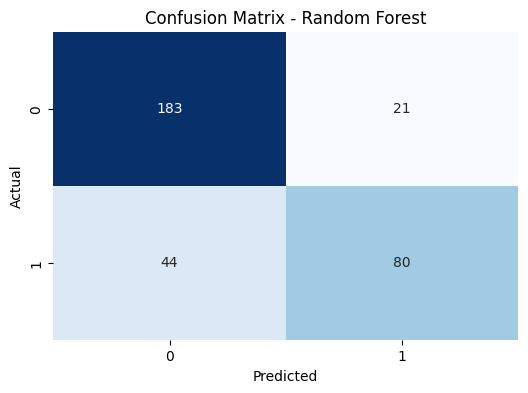


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       204
           1       0.79      0.65      0.71       124

    accuracy                           0.80       328
   macro avg       0.80      0.77      0.78       328
weighted avg       0.80      0.80      0.80       328



In [185]:
# # Random Forest
# rand_forest = RandomForestClassifier()
# rand_forest.fit(X_train, y_train)
# rand_forest_pred = rand_forest.predict(X_test)
# print("Random Forest Accuracy: ", accuracy_score(y_test, rand_forest_pred))

# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, rand_forest_pred))
plot_confusion_matrix(y_test, rand_forest_pred, 'Random Forest')

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rand_forest_pred))

# K-Nearest Neighbors

K-Nearest Neighbors Accuracy:  0.5457317073170732


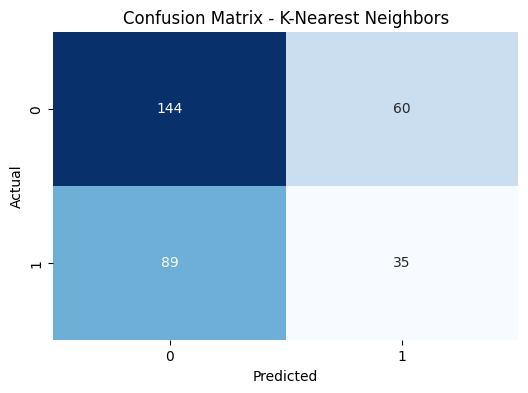


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       204
           1       0.37      0.28      0.32       124

    accuracy                           0.55       328
   macro avg       0.49      0.49      0.49       328
weighted avg       0.52      0.55      0.53       328



In [186]:
# # K-Nearest Neighbors
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# knn_pred = knn.predict(X_test)
# print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, knn_pred))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, knn_pred))
plot_confusion_matrix(y_test, knn_pred, 'K-Nearest Neighbors')

# Classification Report for K-Nearest Neighbors
print("\nClassification Report for K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

# SVM-Support Vector Machine

SVM Accuracy: 0.53


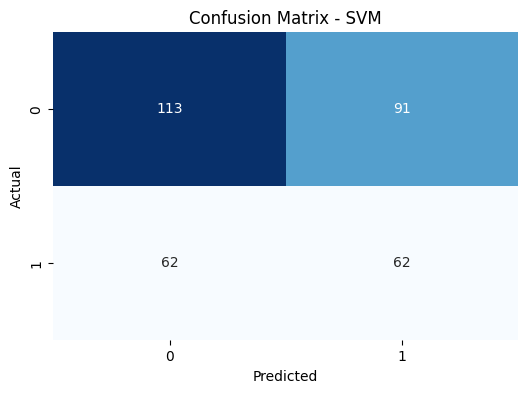

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.65      0.55      0.60       204
           1       0.41      0.50      0.45       124

    accuracy                           0.53       328
   macro avg       0.53      0.53      0.52       328
weighted avg       0.55      0.53      0.54       328



In [187]:
# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear',class_weight='balanced')
svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
plot_confusion_matrix(y_test, svm_pred, 'SVM')

# Print classification report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, svm_pred))

# Naive Bayes Classifier (Gaussian Naive Bayes)

Naive Bayes Accuracy: 0.63


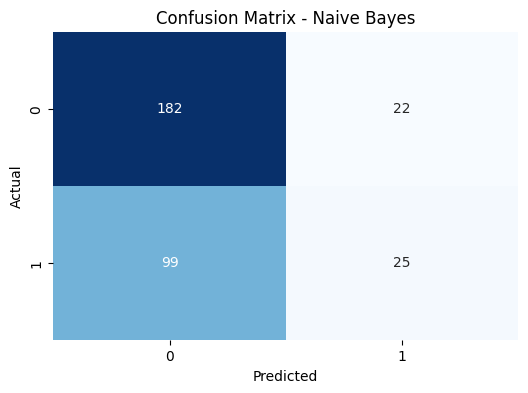


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       204
           1       0.53      0.20      0.29       124

    accuracy                           0.63       328
   macro avg       0.59      0.55      0.52       328
weighted avg       0.60      0.63      0.58       328



In [188]:
# Naive Bayes Classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)

nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

plot_confusion_matrix(y_test, nb_pred, 'Naive Bayes')

# Print classification report for Naive Bayes
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, nb_pred))

# PREDICTING VALUES Test

In [189]:
def predict_potability(ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity):
    # Prepare the input data
    input_data = {
        'ph': ph,
        'Hardness': Hardness,
        'Solids': Solids,
        'Chloramines': Chloramines,
        'Sulfate': Sulfate,
        'Conductivity': Conductivity,
        'Organic_carbon': Organic_carbon,
        'Trihalomethanes': Trihalomethanes,
        'Turbidity': Turbidity
    }

    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data])

    # Use the trained Random Forest model to predict Potability
    potability_prediction = rand_forest.predict(input_df)[0]

    return potability_prediction

# Example usage:
ph_value = 6.319432
hardness_value = 180.9656
solids_value = 36278.72
chloramines_value = 9.960552
sulfate_value = 275.5917
conductivity_value = 307.6914
organic_carbon_value = 18.19693
trihalomethanes_value = 93.59425
turbidity_value = 2.653127

prediction = predict_potability(
    ph=ph_value,
    Hardness=hardness_value,
    Solids=solids_value,
    Chloramines=chloramines_value,
    Sulfate=sulfate_value,
    Conductivity=conductivity_value,
    Organic_carbon=organic_carbon_value,
    Trihalomethanes=trihalomethanes_value,
    Turbidity=turbidity_value
)

print("Predicted Potability:", prediction)


Predicted Potability: 1


# full chart of the model which we have apply

![image.png](attachment:image.png)

# FILLING VALUES WITH MEDIAN

In [190]:
df3=df.copy()
df3.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [191]:
# fill median value in place of null value
df3['ph'].fillna(df3['ph'].median(), inplace=True)
df3['Sulfate'].fillna(df3['Sulfate'].median(), inplace=True)
df3['Trihalomethanes'].fillna(df3['Trihalomethanes'].median(), inplace=True)


In [192]:
df3.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

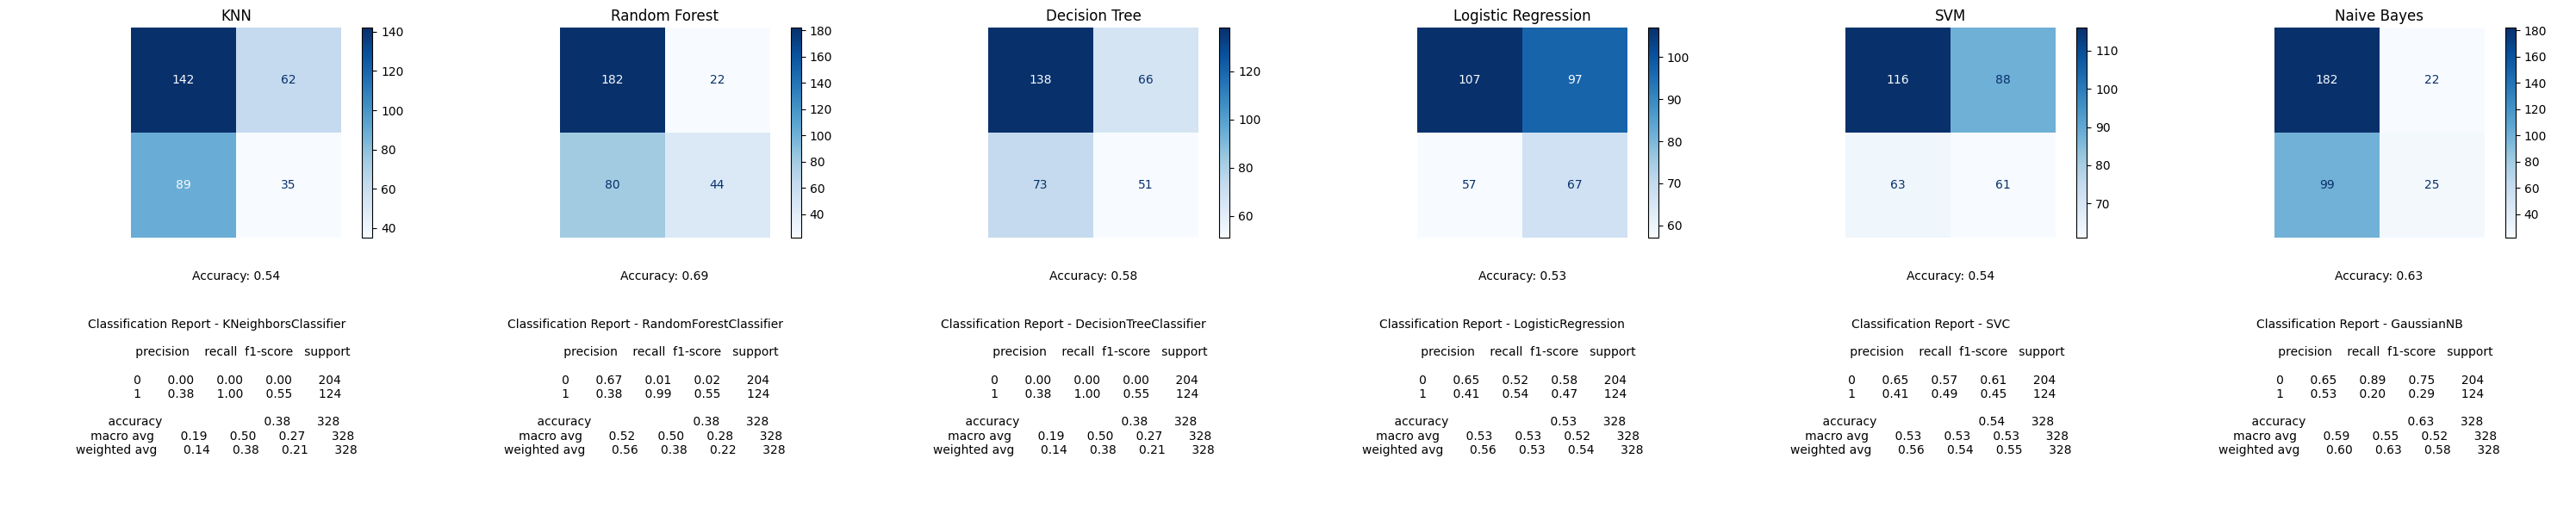

In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix(ax, y_true, y_pred, algorithm_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
    ax.set_title(algorithm_name)
    ax.axis('off')
    accuracy = accuracy_score(y_true, y_pred)
    ax.text(0.5, -0.2, f'Accuracy: {accuracy:.2f}', ha='center', transform=ax.transAxes)

# Define features and target
X = df3.drop('Potability', axis=1)
y = df3['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a single row with multiple subplots
fig, axes = plt.subplots(2, 6, figsize=(30, 6))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
plot_confusion_matrix(axes[0, 0], y_test, knn_pred, 'KNN')

# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)
plot_confusion_matrix(axes[0, 1], y_test, rand_forest_pred, 'Random Forest')

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
plot_confusion_matrix(axes[0, 2], y_test, dec_tree_pred, 'Decision Tree')

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
plot_confusion_matrix(axes[0, 3], y_test, log_reg_pred, 'Logistic Regression')

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', class_weight='balanced')
svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)
plot_confusion_matrix(axes[0, 4], y_test, svm_pred, 'SVM')

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)
plot_confusion_matrix(axes[0, 5], y_test, nb_pred, 'Naive Bayes')

# Classification Reports
for clf, ax in zip([knn, rand_forest, dec_tree, log_reg, svm_classifier, nb_classifier], axes[1]):
    clf_name = clf.__class__.__name__
    clf_pred = clf.predict(X_test_scaled)
    ax.text(0.5, 0.5, f'Classification Report - {clf_name}\n\n{classification_report(y_test, clf_pred)}',
            ha='center', va='center', transform=ax.transAxes)
    ax.axis('off')

plt.tight_layout()
plt.show()


# FILLING VALUES WITH MODE
## work better in categorical data

In [194]:
df4=df.copy()
df4.isnull().sum()
# fill mode value in place of null value
df4.fillna(df4.mode().iloc[0], inplace=True)

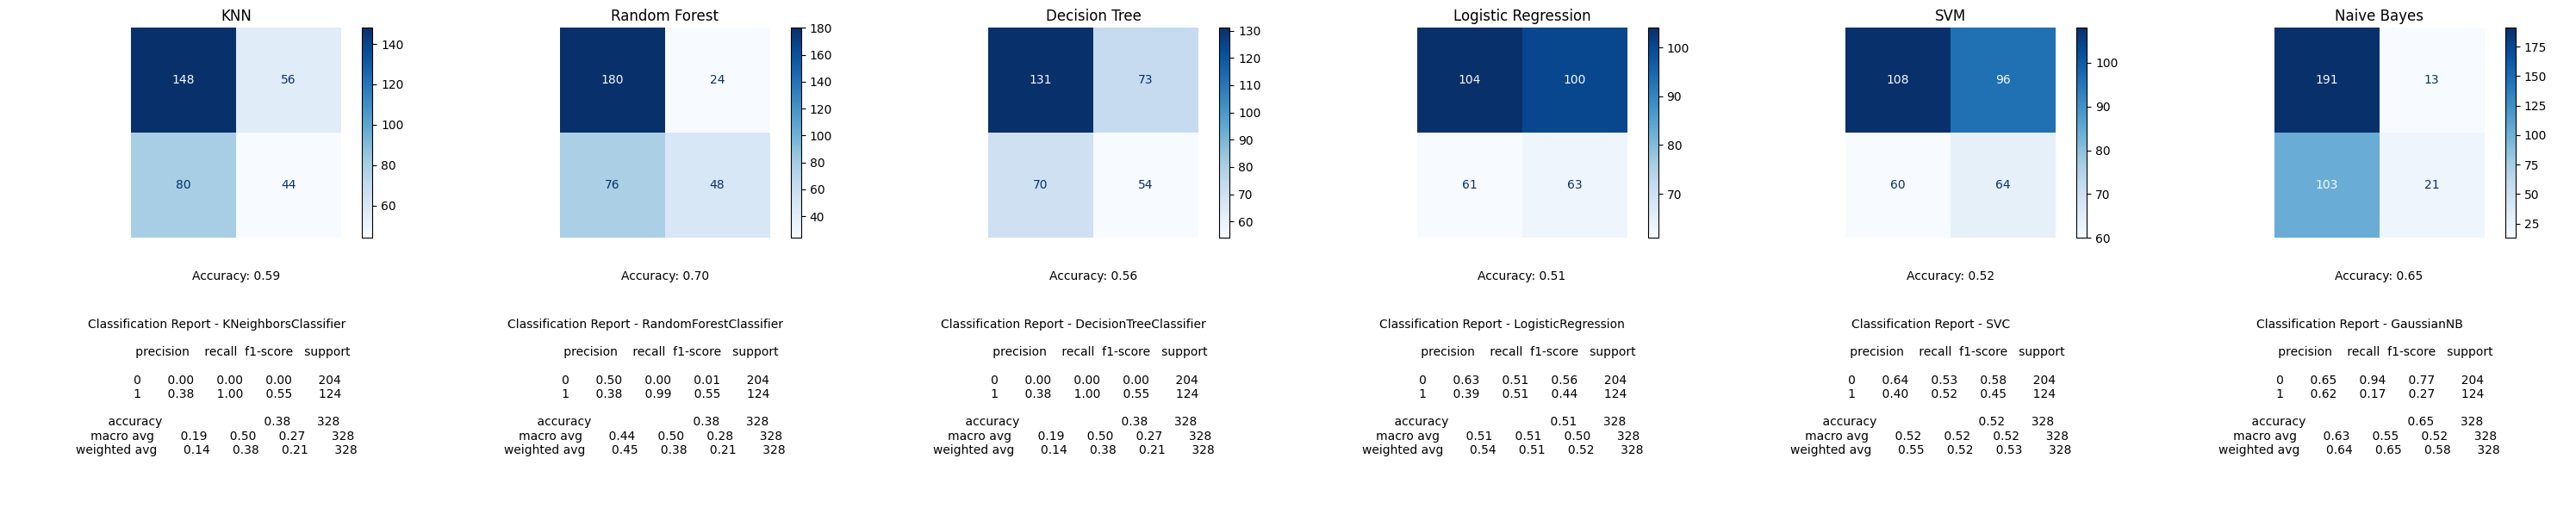

In [195]:

# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix(ax, y_true, y_pred, algorithm_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
    ax.set_title(algorithm_name)
    ax.axis('off')
    accuracy = accuracy_score(y_true, y_pred)
    ax.text(0.5, -0.2, f'Accuracy: {accuracy:.2f}', ha='center', transform=ax.transAxes)

# Define features and target
X = df4.drop('Potability', axis=1)
y = df4['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a single row with multiple subplots
fig, axes = plt.subplots(2, 6, figsize=(30, 6))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
plot_confusion_matrix(axes[0, 0], y_test, knn_pred, 'KNN')

# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)
plot_confusion_matrix(axes[0, 1], y_test, rand_forest_pred, 'Random Forest')

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
plot_confusion_matrix(axes[0, 2], y_test, dec_tree_pred, 'Decision Tree')

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
plot_confusion_matrix(axes[0, 3], y_test, log_reg_pred, 'Logistic Regression')

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', class_weight='balanced')
svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)
plot_confusion_matrix(axes[0, 4], y_test, svm_pred, 'SVM')

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)
plot_confusion_matrix(axes[0, 5], y_test, nb_pred, 'Naive Bayes')

# Classification Reports
for clf, ax in zip([knn, rand_forest, dec_tree, log_reg, svm_classifier, nb_classifier], axes[1]):
    clf_name = clf.__class__.__name__
    clf_pred = clf.predict(X_test_scaled)
    ax.text(0.5, 0.5, f'Classification Report - {clf_name}\n\n{classification_report(y_test, clf_pred)}',
            ha='center', va='center', transform=ax.transAxes)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Here we use imbalance class now we will use balance class to check outcome

### using Smote

In [196]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

### With mean

In [197]:
print(df2.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [198]:
df2_2=df2.copy()
df2_2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [199]:
df2_2
df2_2.value_counts(['Potability'])

Potability
0             1998
1             1278
dtype: int64

In [200]:
# Assuming your DataFrame is named 'df'
X = df2_2.drop('Potability', axis=1)
y = df2_2['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Handle Class Imbalance with SMOTE

In [201]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [202]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

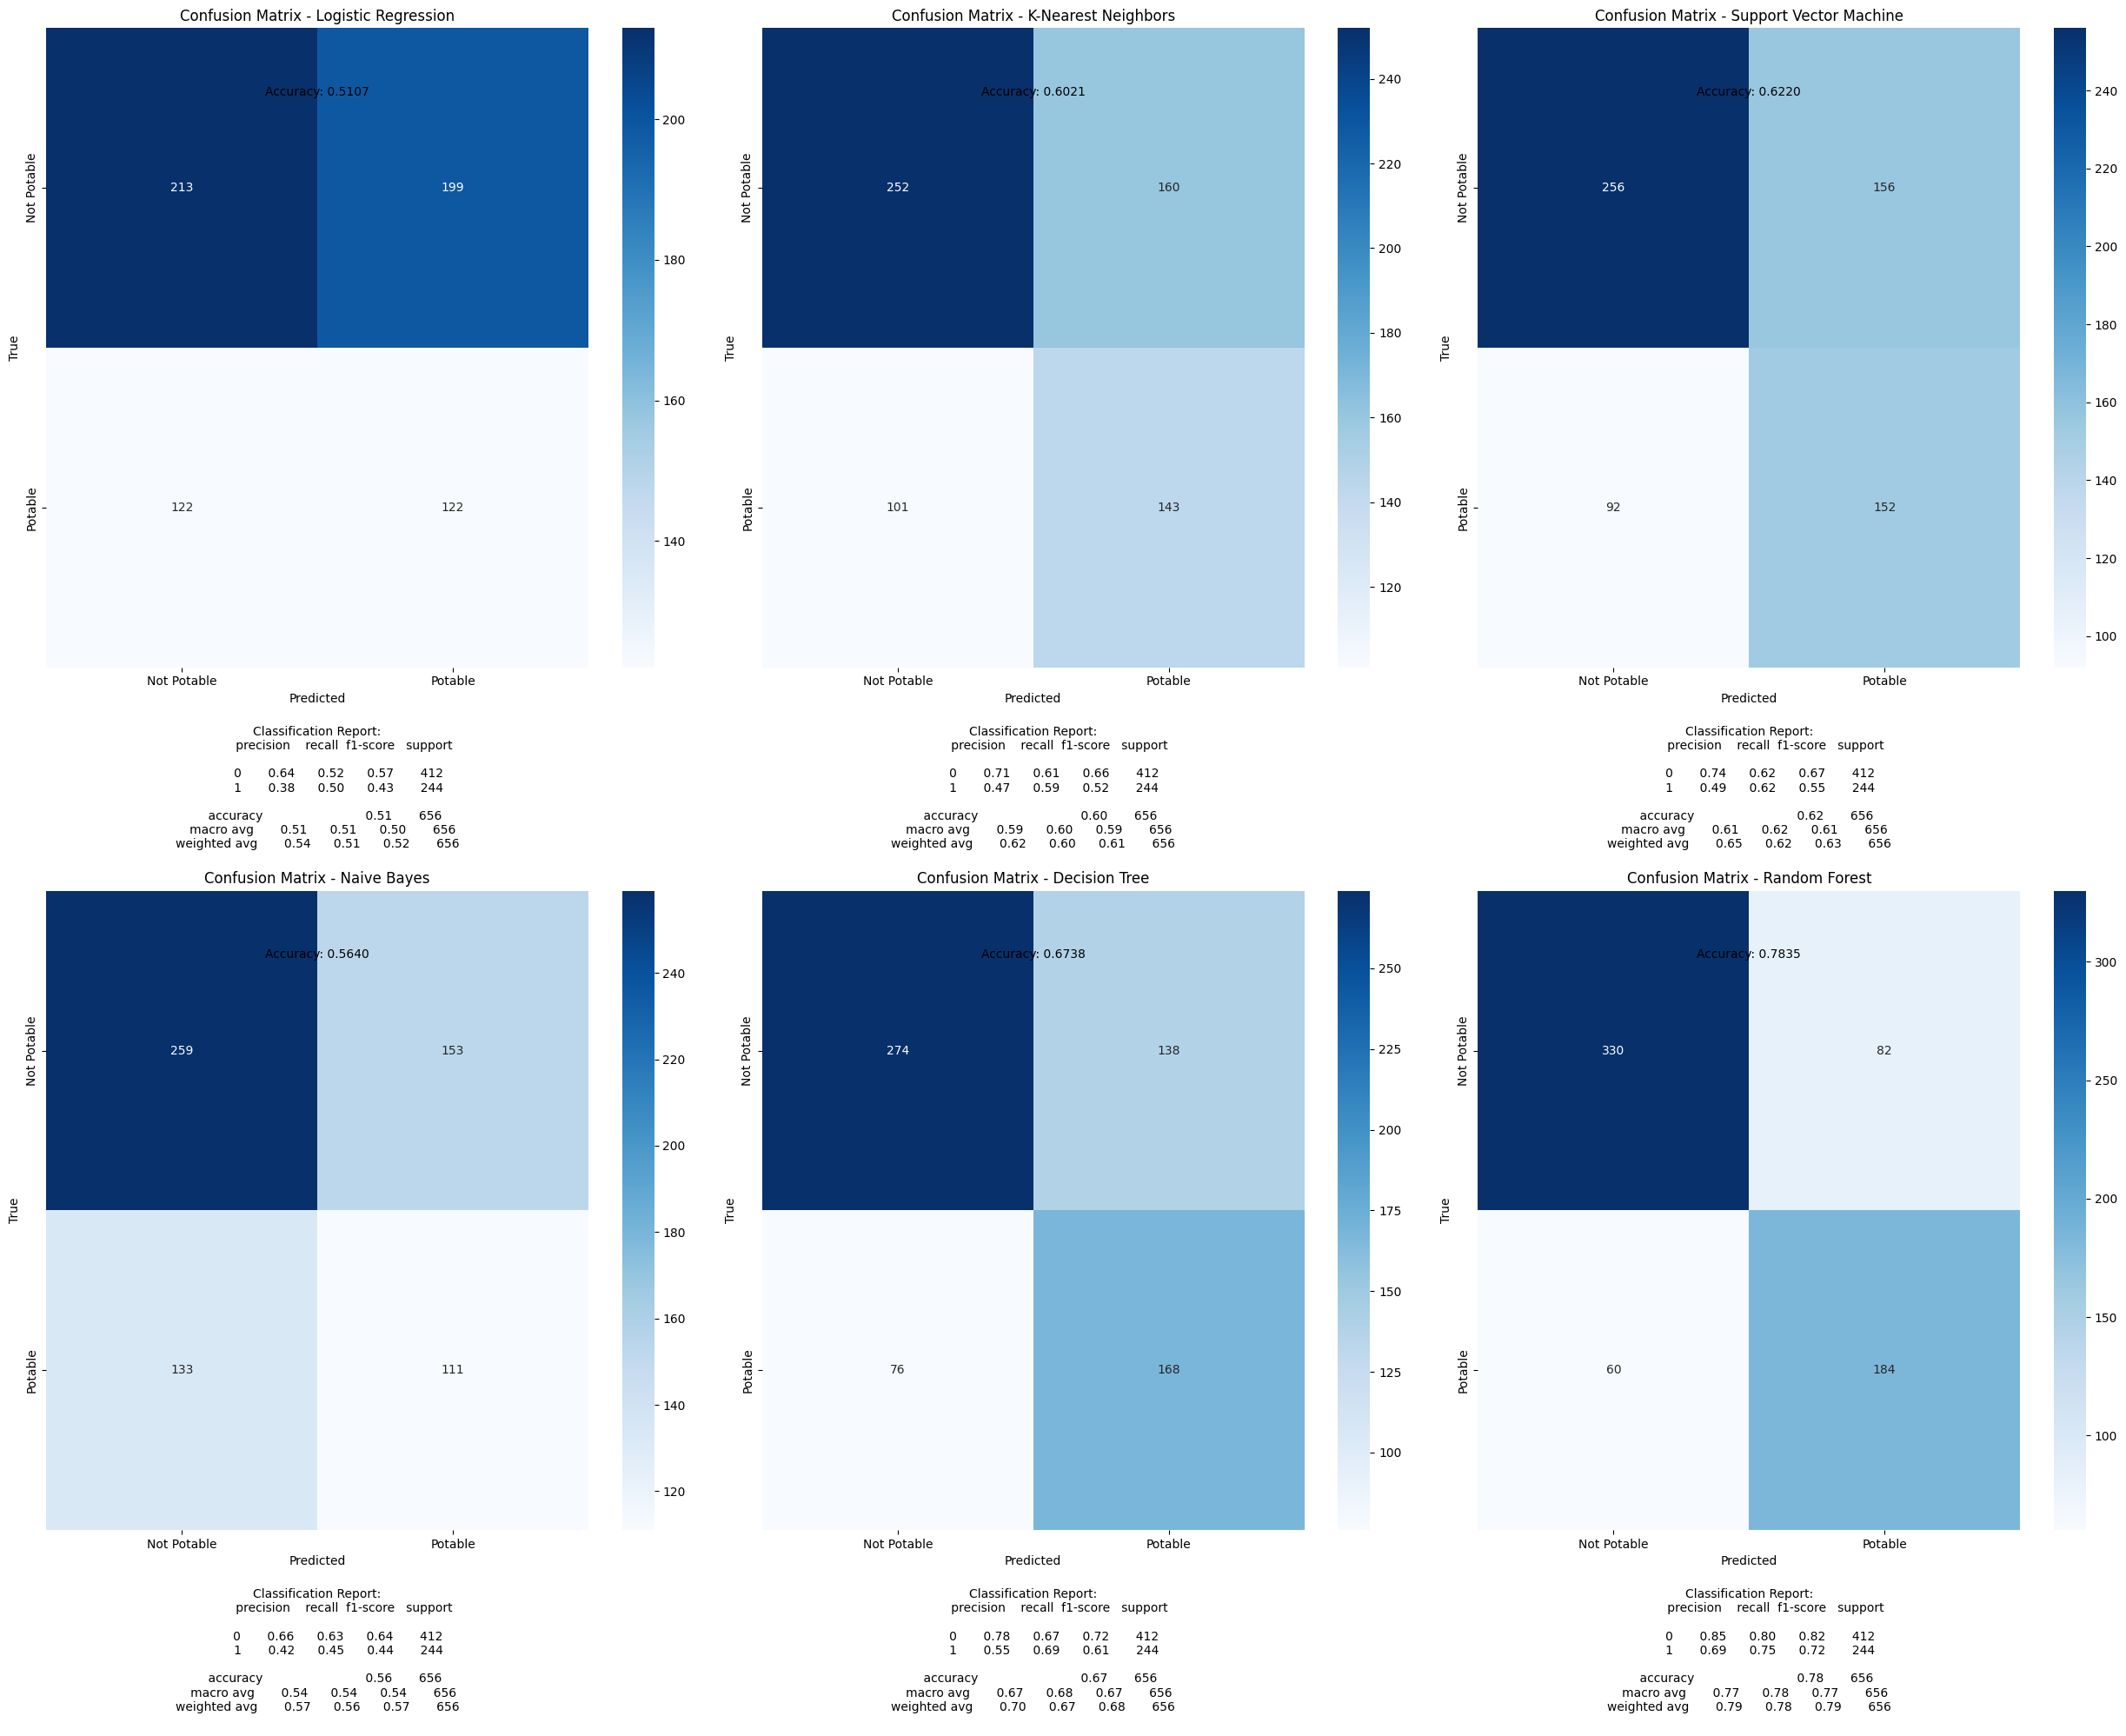

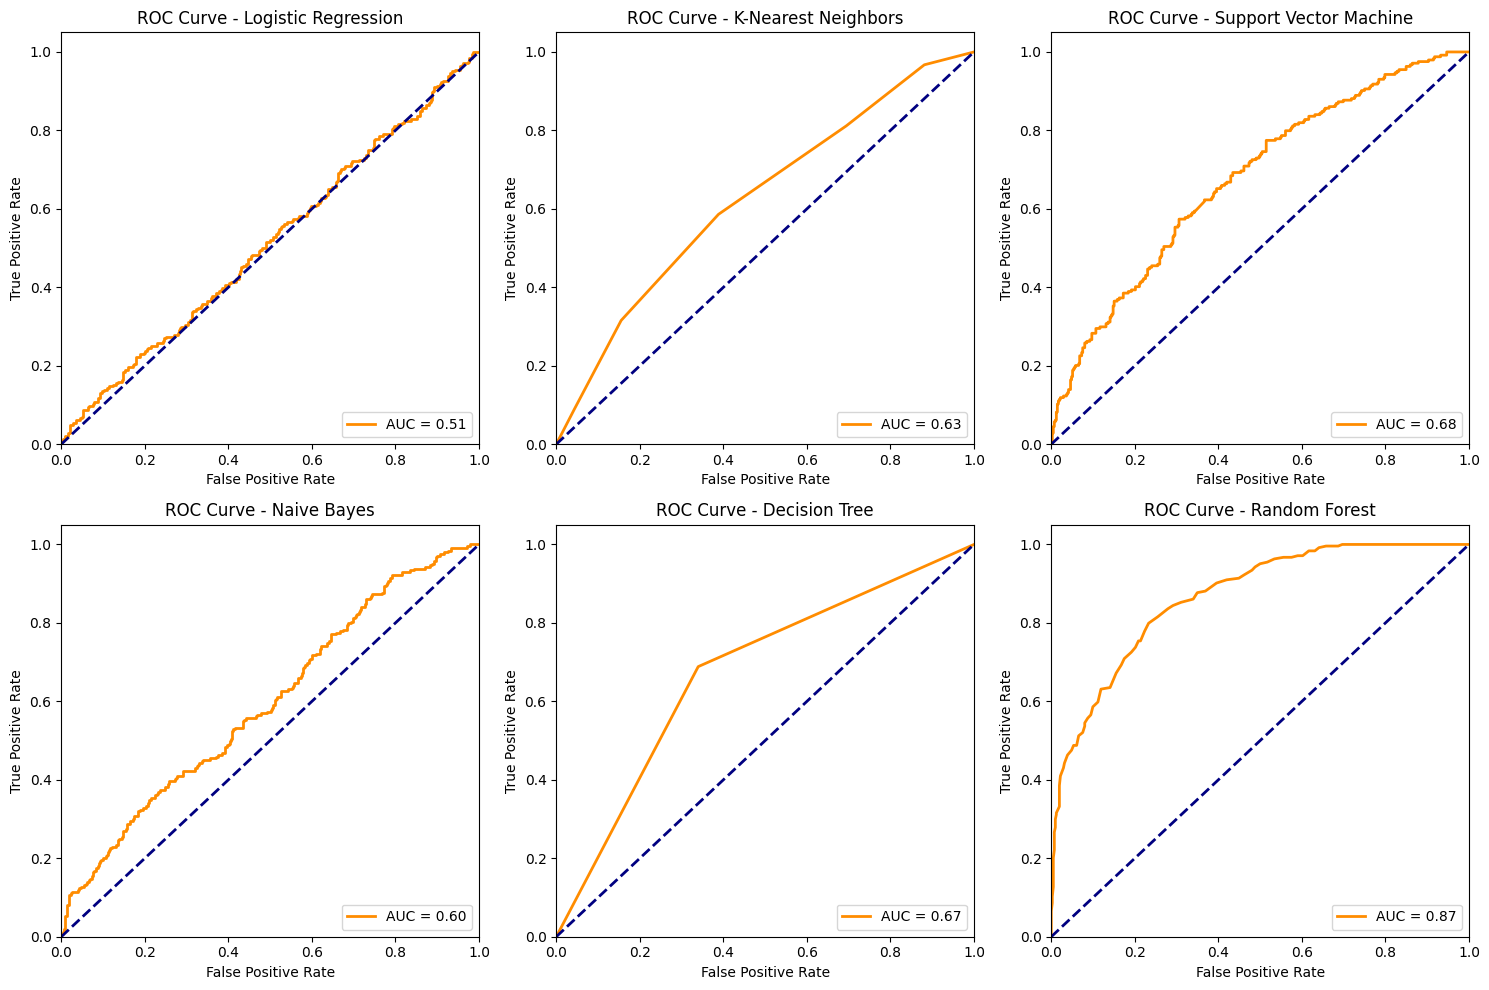

In [203]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    return accuracy, report, matrix, fpr, tpr, roc_auc

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Set the figure size
plt.figure(figsize=(25, 20))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    accuracy, report, matrix, _, _, _ = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test, y_test)

    # Print Accuracy
    plt.text(0.5, 0.9, f'Accuracy: {accuracy:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    # Plot confusion matrix as a heatmap
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Print Classification Report
    plt.text(0.5, -0.2, f'Classification Report:\n{report}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Set the figure size
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for (name, model), ax in zip(models.items(), axs.flatten()):
    _, _, _, fpr, tpr, roc_auc = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test, y_test)

    # Plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

Receiver Operating Characteristic (ROC) curve is a graphical representation commonly used to assess the performance of a binary classification model at various classification thresholds.

Cross-validation is a technique used to assess the performance and generalization of a machine learning model. It involves splitting the dataset into multiple folds, training the model on different subsets, and evaluating its performance on the remaining data.

In [204]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def cross_validate(model, X, y):
    # Use StratifiedKFold for classification problems to ensure class distribution in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    return scores

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Print AUC scores for each model using cross-validation
for name, model in models.items():
    scores = cross_validate(model, X_train_resampled, y_train_resampled)
    print(f'{name} - AUC Scores: {scores}')
    print(f'Mean AUC: {scores.mean():.4f}\n')


Logistic Regression - AUC Scores: [0.49951392 0.50642819 0.47063858 0.49509897 0.49339729]
Mean AUC: 0.4930

K-Nearest Neighbors - AUC Scores: [0.66758923 0.70974446 0.68887142 0.707361   0.70188777]
Mean AUC: 0.6951

Support Vector Machine - AUC Scores: [0.71270559 0.74313037 0.70765954 0.70053439 0.75283862]
Mean AUC: 0.7234

Naive Bayes - AUC Scores: [0.59001448 0.55545305 0.5667685  0.60342923 0.6102459 ]
Mean AUC: 0.5852

Decision Tree - AUC Scores: [0.7181517  0.69603496 0.75394322 0.72712934 0.69716088]
Mean AUC: 0.7185

Random Forest - AUC Scores: [0.87308791 0.88194651 0.87637453 0.90066077 0.88129049]
Mean AUC: 0.8827



which stands for Area Under the Curve, is a metric used to evaluate the performance of a binary classification model, particularly when assessing the Receiver Operating Characteristic (ROC) curve. The ROC curve plots the True Positive Rate (sensitivity or recall) against the False Positive Rate at various classification thresholds, and the AUC represents the area under this curve

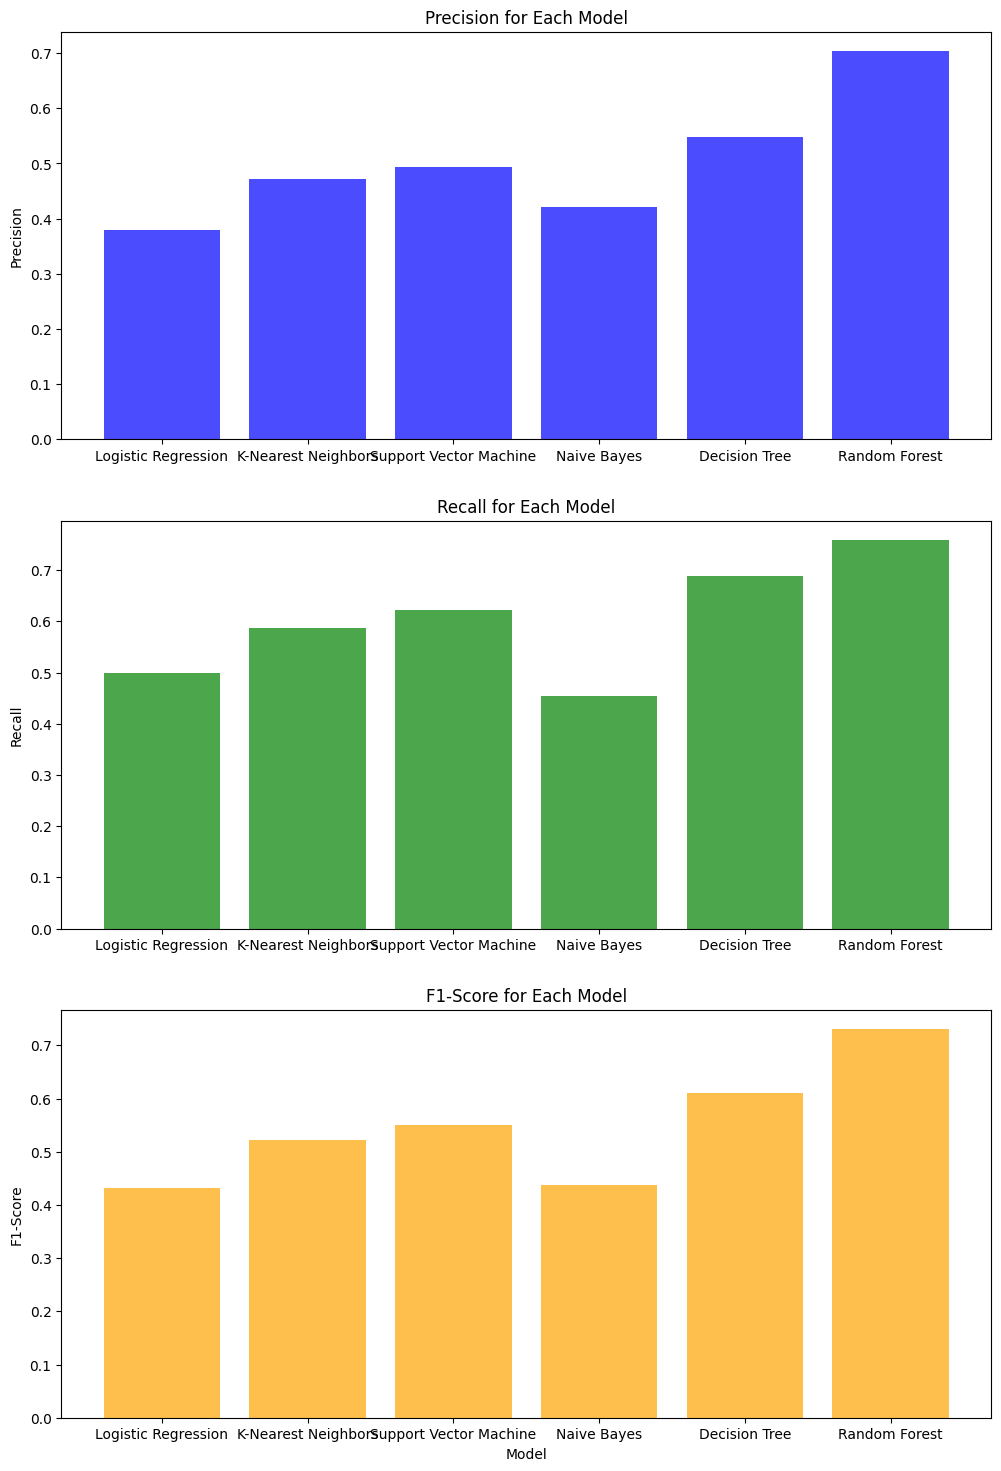

In [205]:
from sklearn.metrics import precision_score, recall_score, f1_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return precision, recall, f1

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Set the figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models.items():
    precision, recall, f1 = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test, y_test)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plotting Precision
axs[0].bar(models.keys(), precision_scores, alpha=0.7, color='blue')
axs[0].set_title('Precision for Each Model')
axs[0].set_ylabel('Precision')

# Plotting Recall
axs[1].bar(models.keys(), recall_scores, alpha=0.7, color='green')
axs[1].set_title('Recall for Each Model')
axs[1].set_ylabel('Recall')

# Plotting F1-Score
axs[2].bar(models.keys(), f1_scores, alpha=0.7, color='orange')
axs[2].set_title('F1-Score for Each Model')
axs[2].set_ylabel('F1-Score')

plt.xlabel('Model')
plt.show()


### with median

In [206]:
df3_3=df3.copy()
df3_3.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [207]:

X = df3_3.drop('Potability', axis=1)
y = df3_3['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


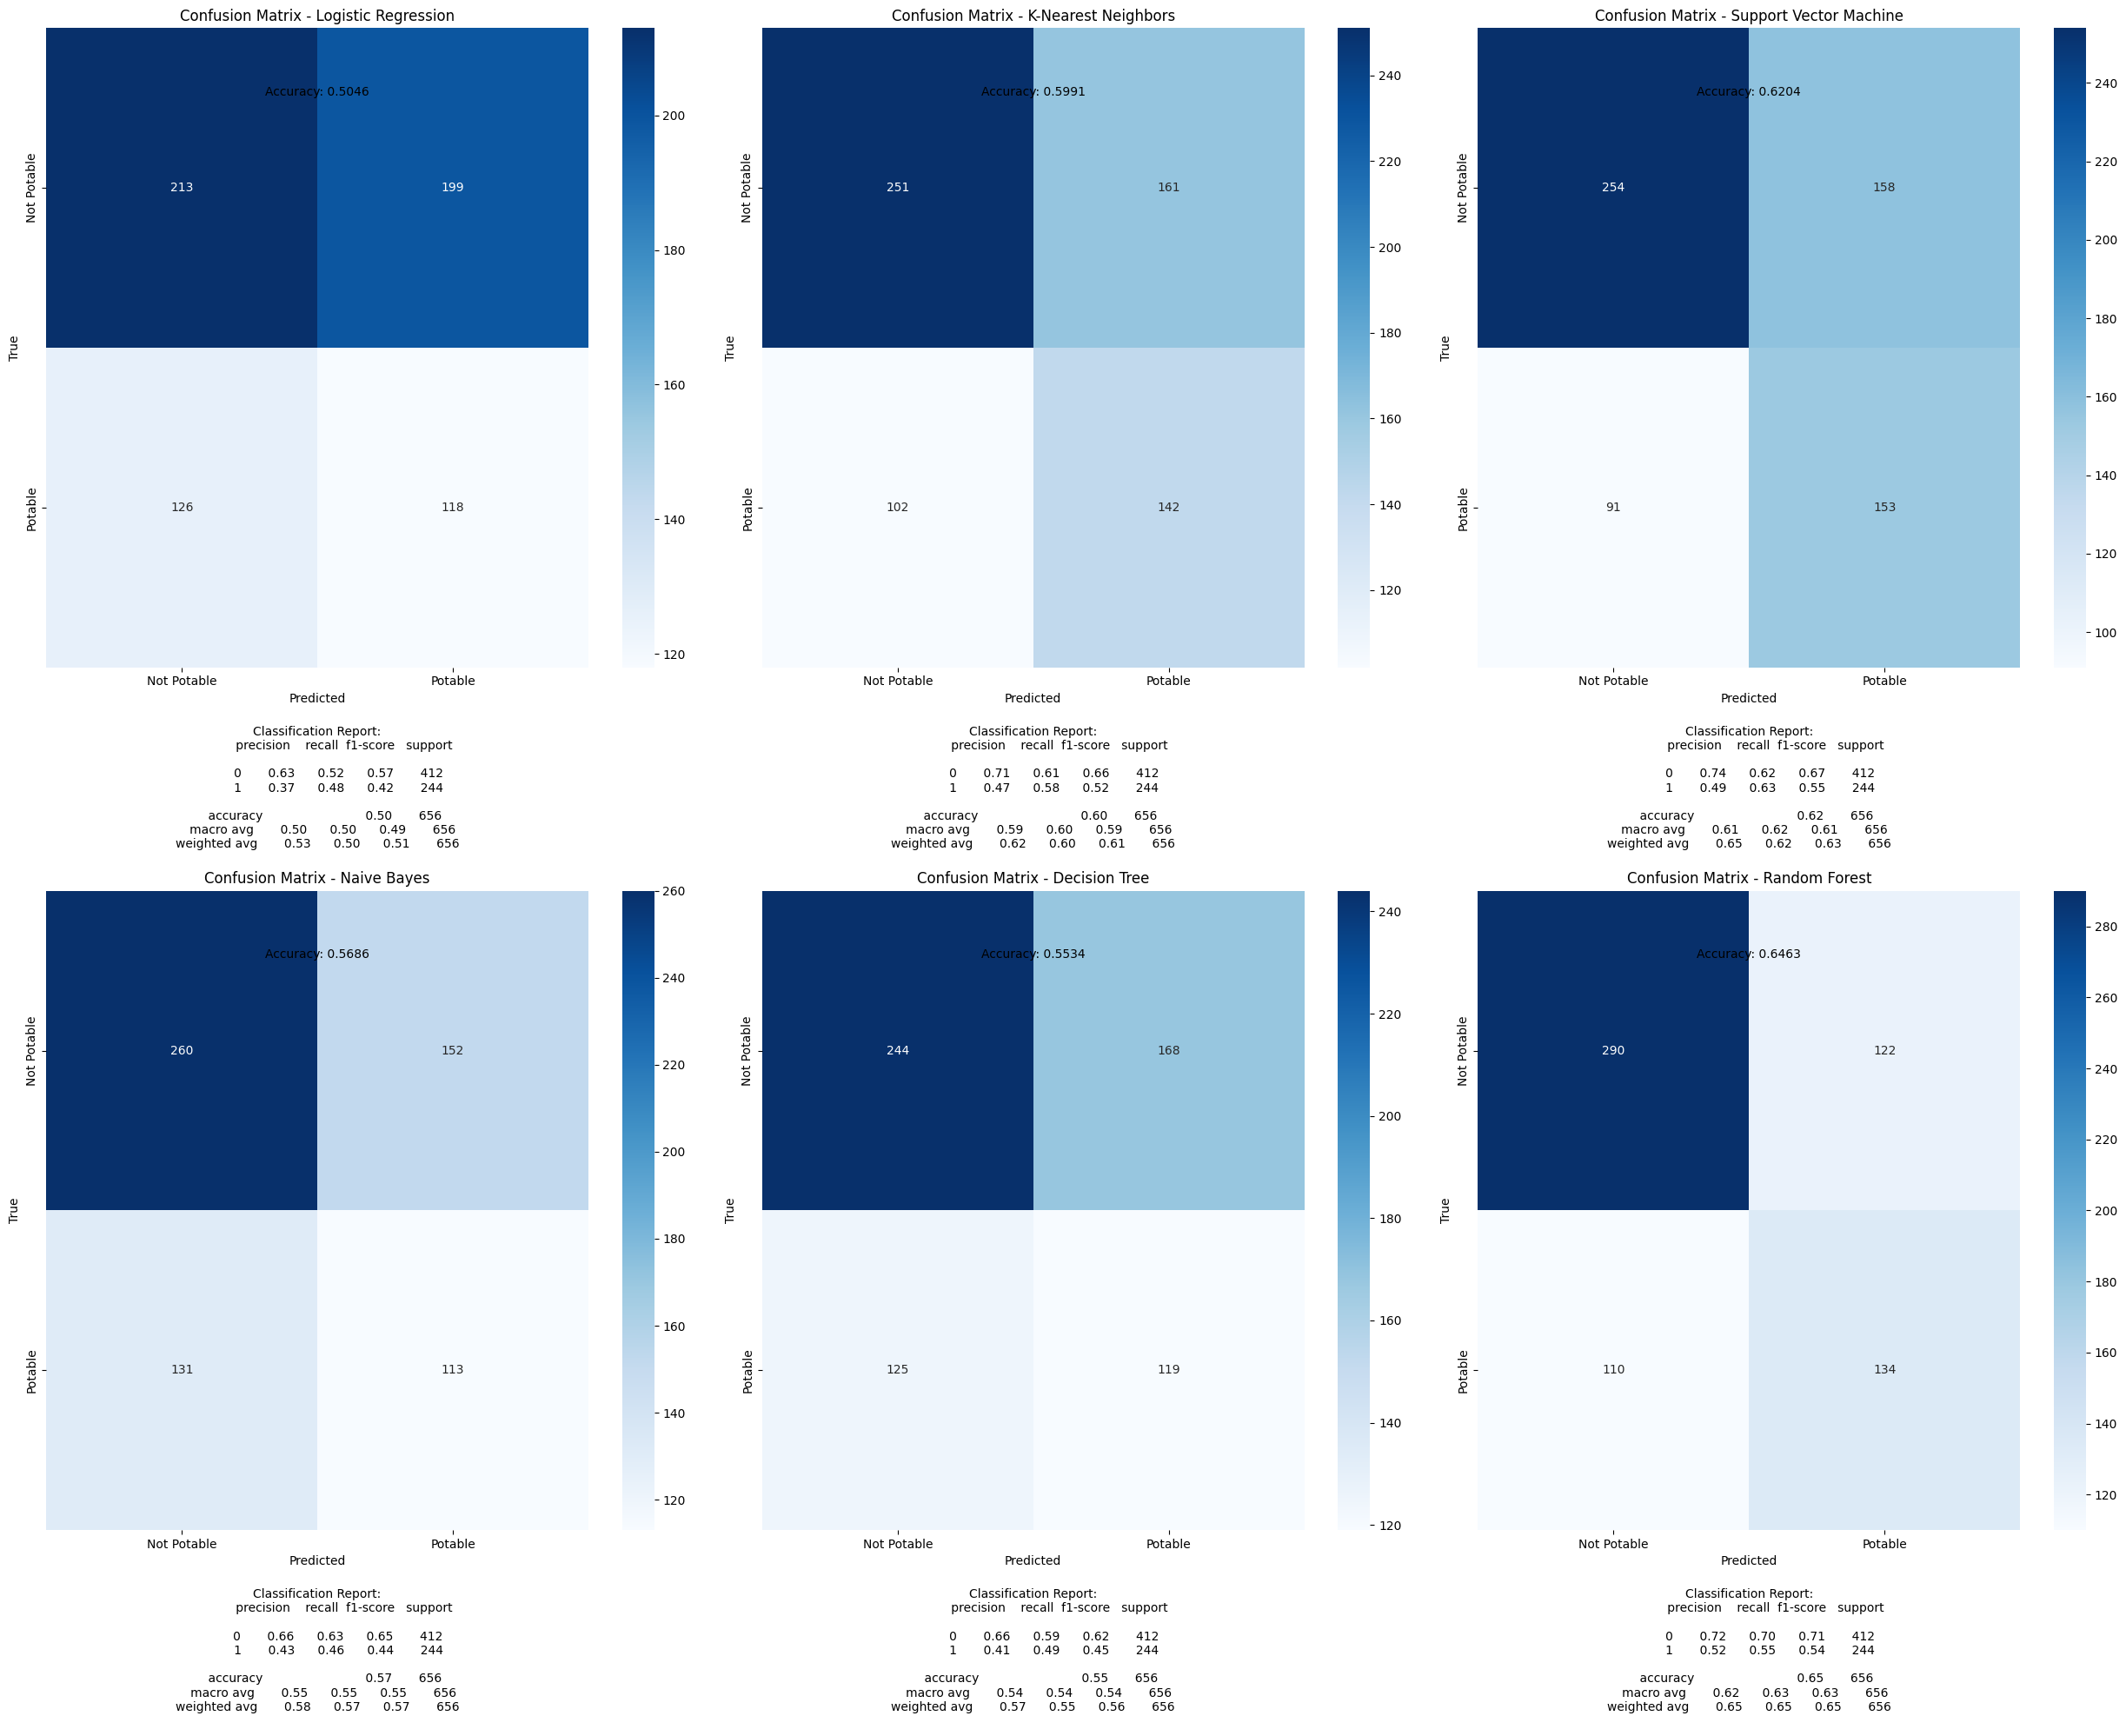

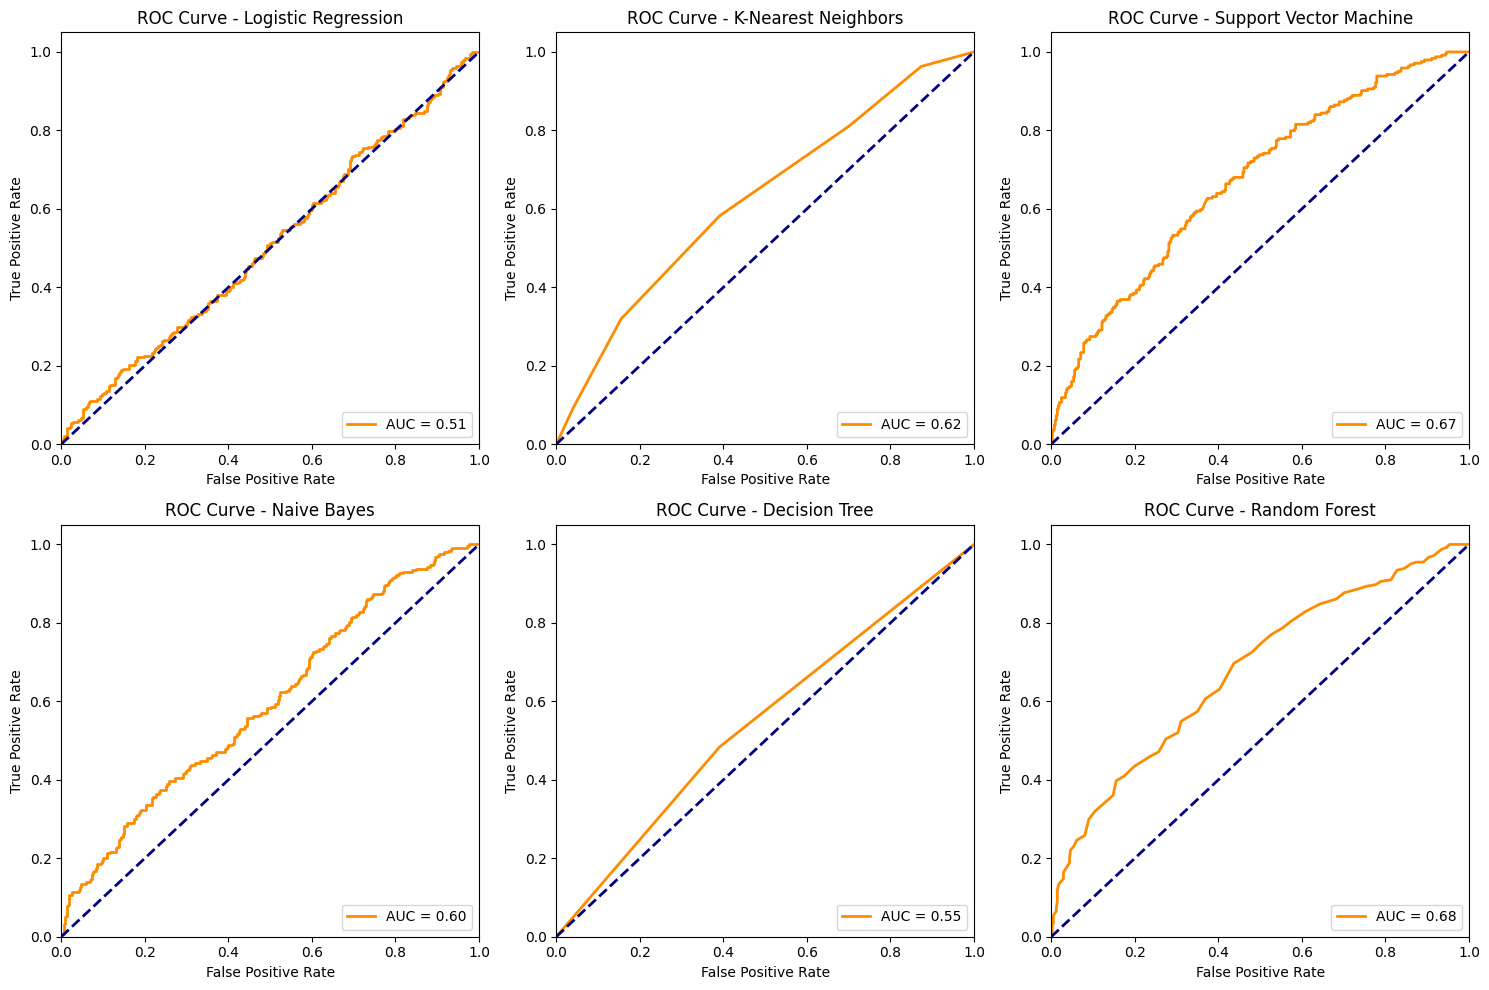

In [208]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    return accuracy, report, matrix, fpr, tpr, roc_auc

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Set the figure size
plt.figure(figsize=(25, 20))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    accuracy, report, matrix, _, _, _ = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test, y_test)

    # Print Accuracy
    plt.text(0.5, 0.9, f'Accuracy: {accuracy:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    # Plot confusion matrix as a heatmap
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Print Classification Report
    plt.text(0.5, -0.2, f'Classification Report:\n{report}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Set the figure size
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for (name, model), ax in zip(models.items(), axs.flatten()):
    _, _, _, fpr, tpr, roc_auc = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test, y_test)

    # Plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [209]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def cross_validate(model, X, y):
    # Use StratifiedKFold for classification problems to ensure class distribution in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    return scores

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Print AUC scores for each model using cross-validation
for name, model in models.items():
    scores = cross_validate(model, X_train_resampled, y_train_resampled)
    print(f'{name} - AUC Scores: {scores}')
    print(f'Mean AUC: {scores.mean():.4f}\n')


Logistic Regression - AUC Scores: [0.49939488 0.50853124 0.47010121 0.49219318 0.49468101]
Mean AUC: 0.4930

K-Nearest Neighbors - AUC Scores: [0.66681051 0.70754221 0.68827434 0.70117127 0.70002189]
Mean AUC: 0.6928

Support Vector Machine - AUC Scores: [0.71387616 0.74122572 0.70608723 0.69736986 0.75208232]
Mean AUC: 0.7221

Naive Bayes - AUC Scores: [0.59110569 0.55540345 0.56651972 0.6032302  0.6102459 ]
Mean AUC: 0.5853

Decision Tree - AUC Scores: [0.60792016 0.58742039 0.58359621 0.63249211 0.5977918 ]
Mean AUC: 0.6018

Random Forest - AUC Scores: [0.75110608 0.77830685 0.74074774 0.79160406 0.77785131]
Mean AUC: 0.7679



### with mode

In [210]:
df4_4=df4.copy()
df4_4.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

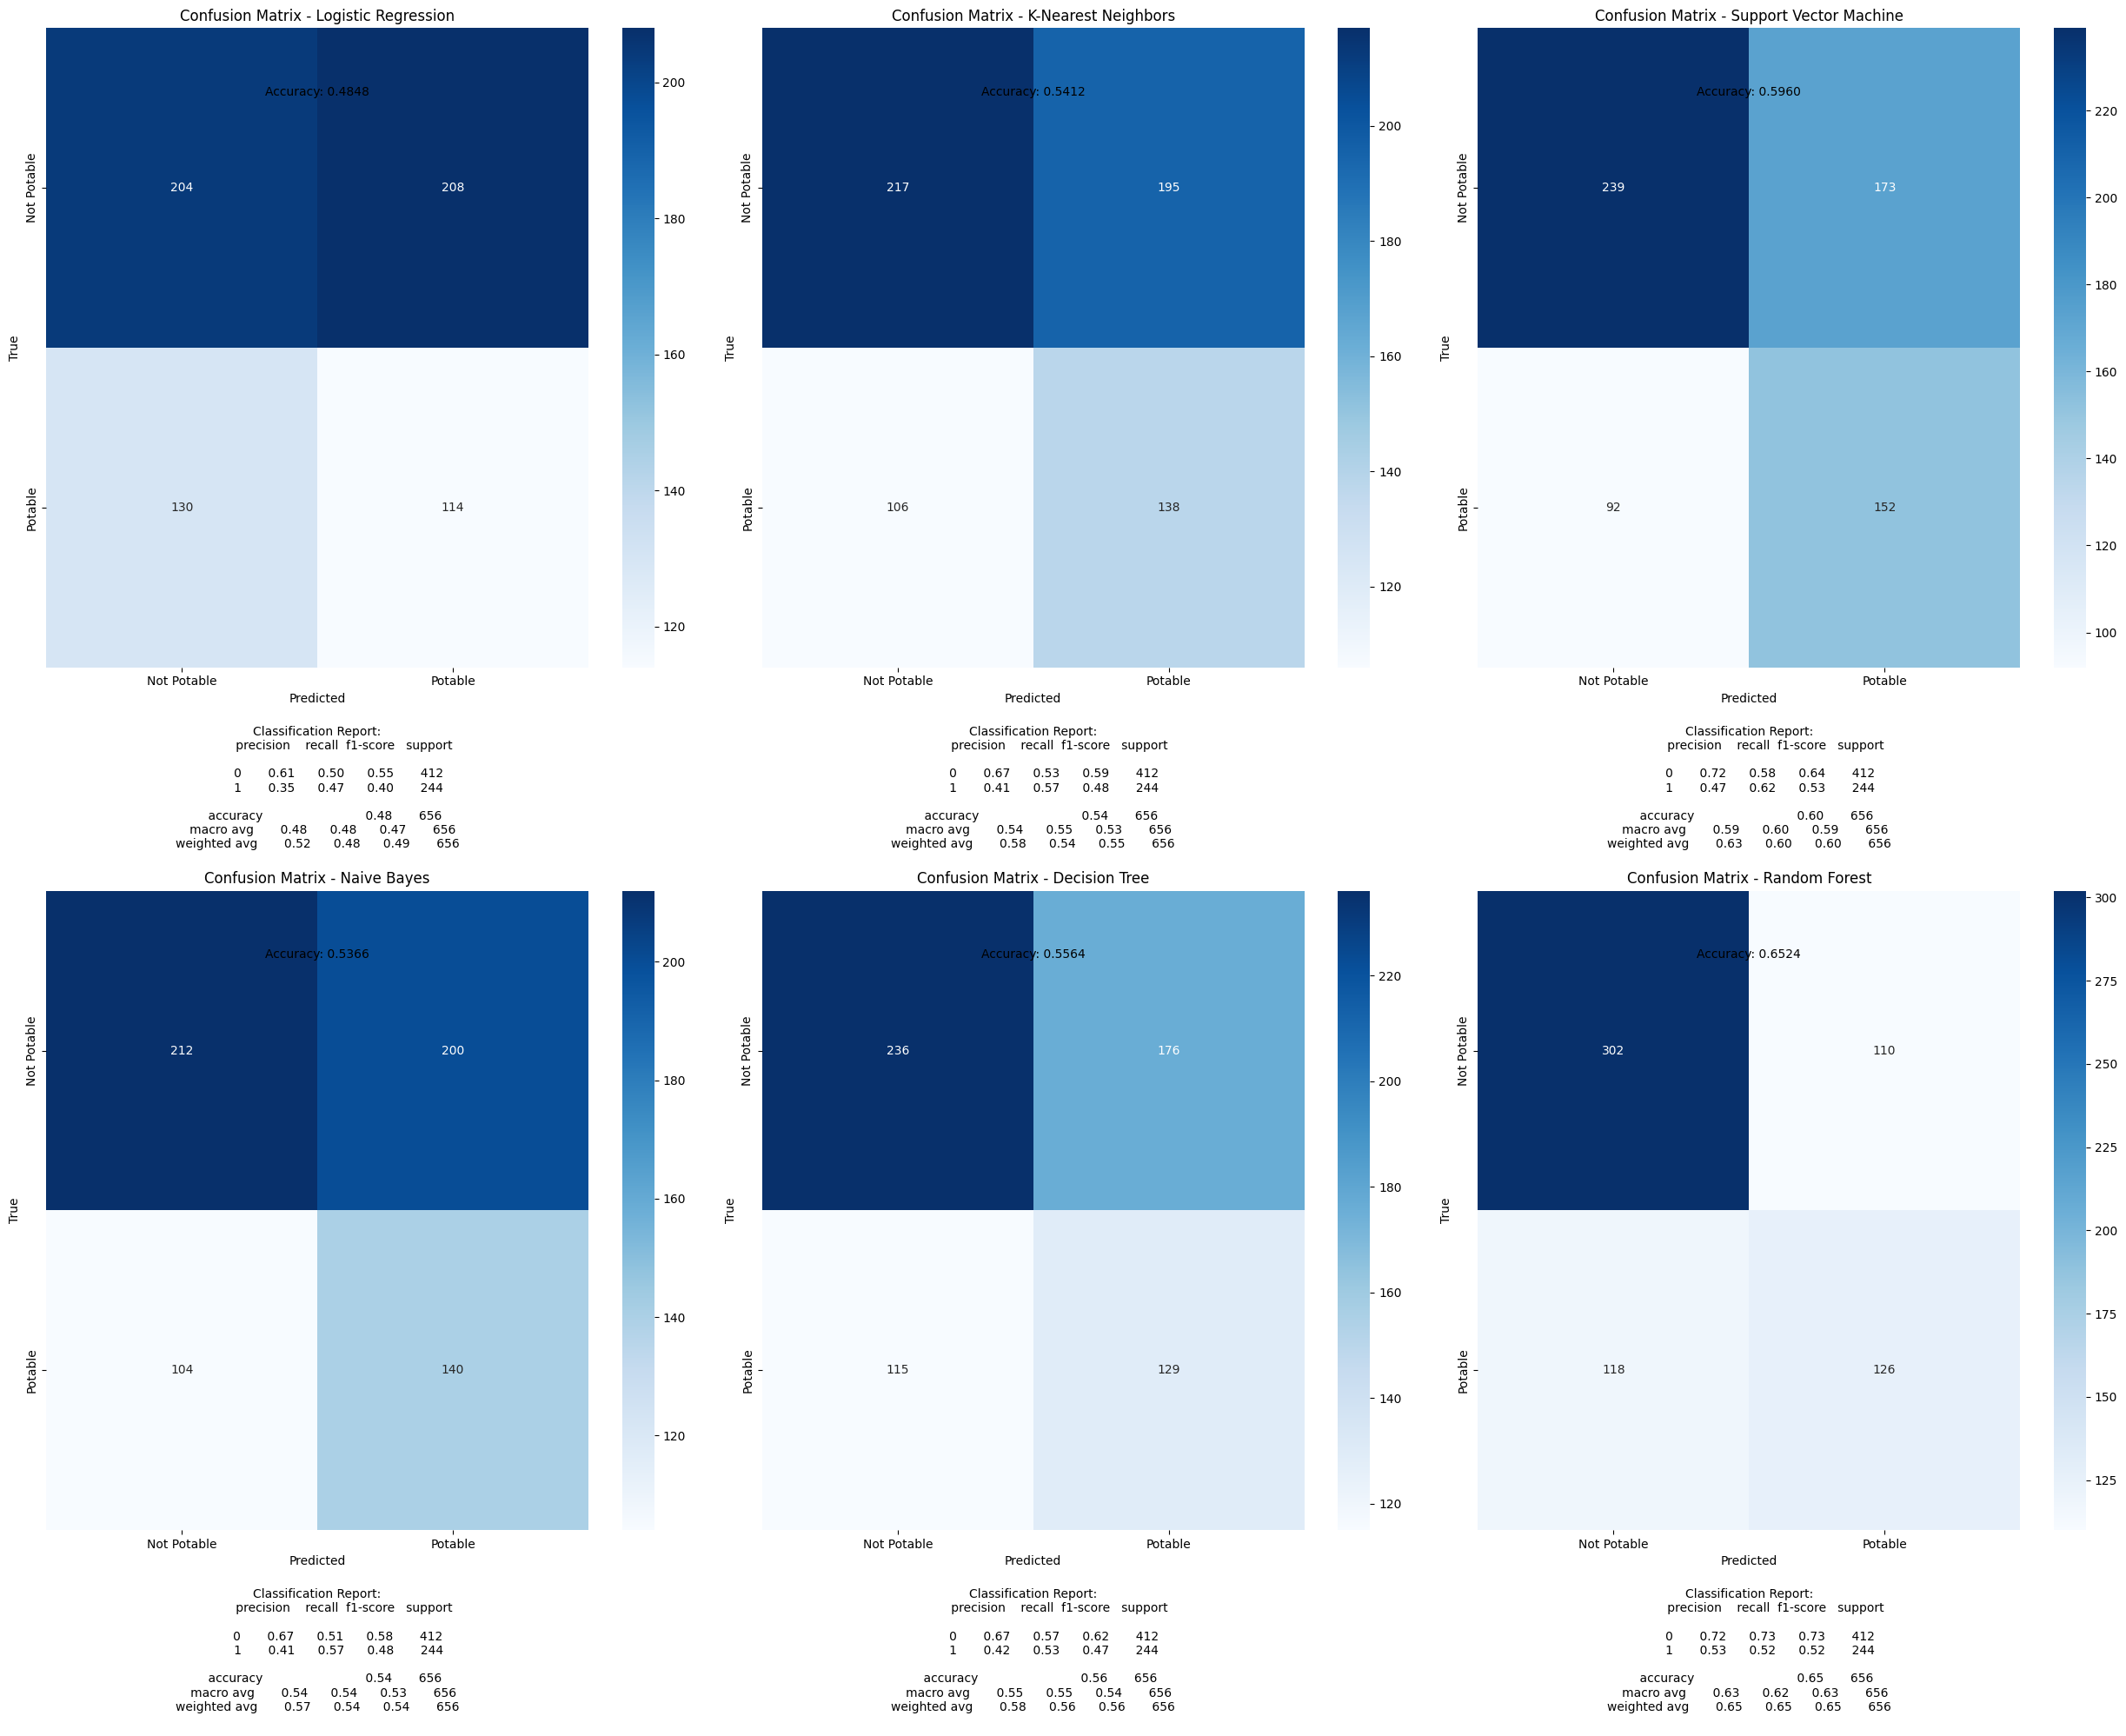

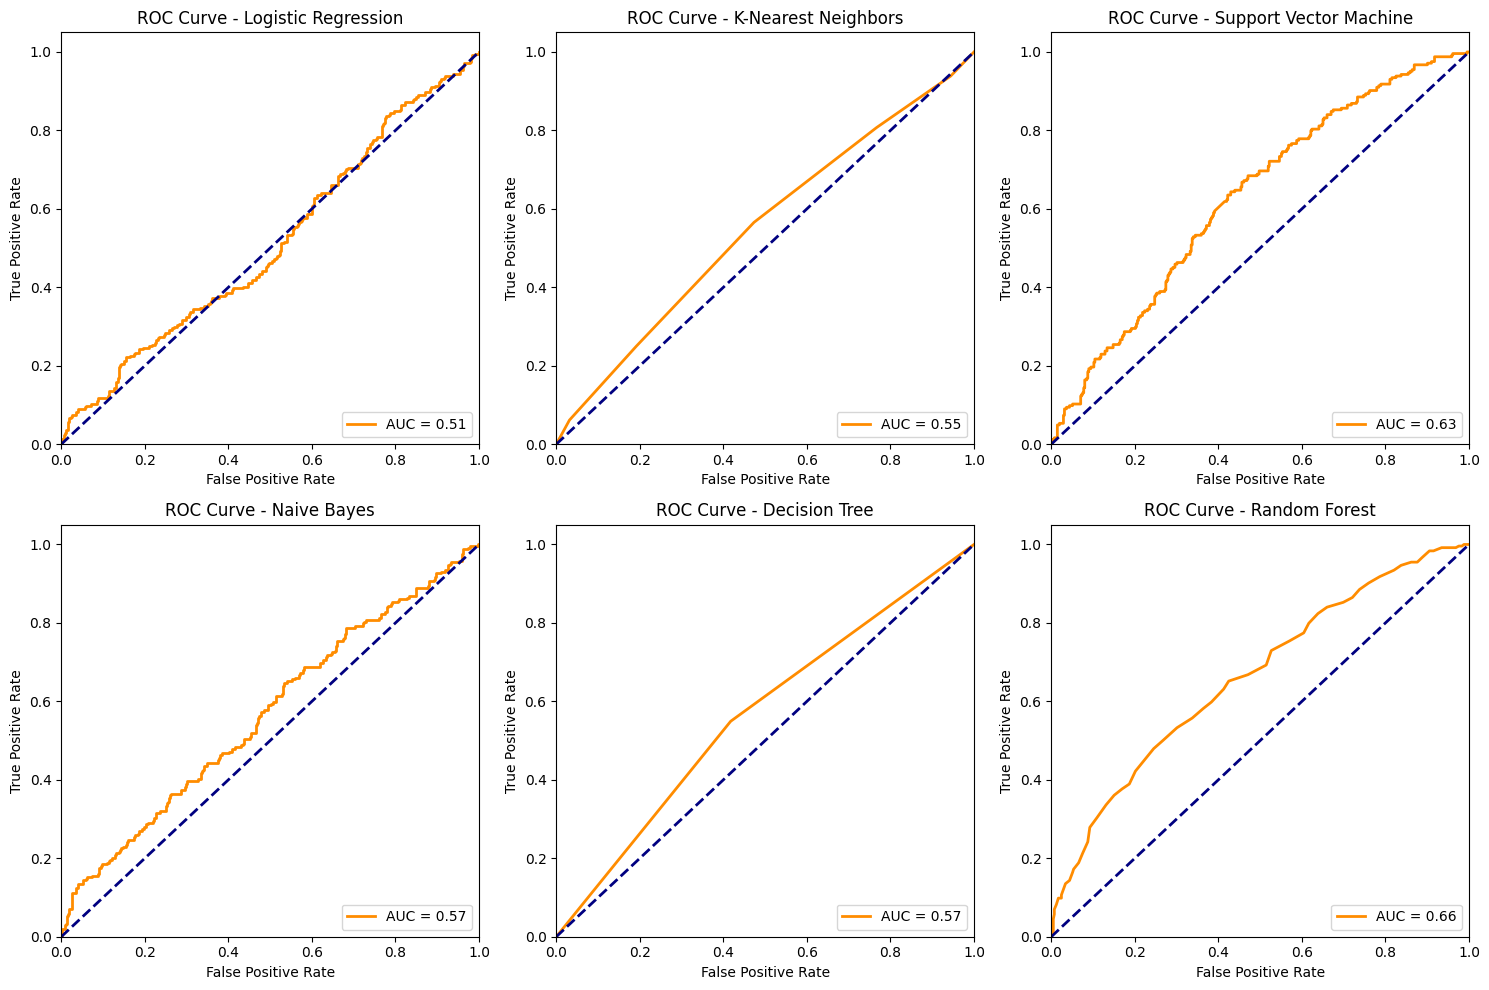

In [211]:

X = df4_4.drop('Potability', axis=1)
y = df4_4['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    return accuracy, report, matrix, fpr, tpr, roc_auc

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Set the figure size
plt.figure(figsize=(25, 20))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    accuracy, report, matrix, _, _, _ = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test, y_test)

    # Print Accuracy
    plt.text(0.5, 0.9, f'Accuracy: {accuracy:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    # Plot confusion matrix as a heatmap
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Print Classification Report
    plt.text(0.5, -0.2, f'Classification Report:\n{report}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Set the figure size
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for (name, model), ax in zip(models.items(), axs.flatten()):
    _, _, _, fpr, tpr, roc_auc = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test, y_test)

    # Plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def cross_validate(model, X, y):
    # Use StratifiedKFold for classification problems to ensure class distribution in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    return scores

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Print AUC scores for each model using cross-validation
for name, model in models.items():
    scores = cross_validate(model, X_train_resampled, y_train_resampled)
    print(f'{name} - AUC Scores: {scores}')
    print(f'Mean AUC: {scores.mean():.4f}\n')


Logistic Regression - AUC Scores: [0.51678472 0.5217745  0.48858084 0.53656619 0.5005722 ]
Mean AUC: 0.5129

K-Nearest Neighbors - AUC Scores: [0.62839514 0.65371605 0.6496532  0.63078546 0.64458796]
Mean AUC: 0.6414

